***
<img align="right" src="images/Logo_Università_Padova.png" alt="Drawing" style="width: 300px"/>

# AS4PA Final Project
# Study of rare $\Lambda_b^0$ decay using multivariate analysis techniques

### Authors
* [**Ardino Rocco**](https://github.com/RoccoA97) (University of Padua, Physics of Data)
* [**Valente Alessandro**](https://github.com/mastrovalentz) (University of Padua, Physics of Data)



### Abstract
The b-Baryon decay

$$
\Lambda_b^0
\longrightarrow
\Lambda_c^+ 3\pi
$$

has never been observed, however it is a fundamental ingredient for the studies of lepton universality in semileptonic $\Lambda_b^0$ decays. Using a sample of LHCb data prepared with observables useful for discriminating signal from background events, the student is required to perform a signal selection separating interesting events from background using multivariate analysis techniques, including Deep Neural Networks. After having selected the best figure-of-merit able to successfully solve the problem, a detailed study of the effect on the multivariate analysis due to different fractions of the total sample used for training the network is required (minimizing the overtraining if present). The performances of the sample selection will be studied as a function of the different regularization algorithms used. After this the sample selection will be performed with the Deep Neural Network, where an optimization of the number of neurons, the activation function type and the cost function is required.
***

<br>
<br>
<br>
<br>
<br>

***
# Index <a class="anchor" id="FP.i"></a>

* 0. [R libraries load](#AS4PA_FP.0.)
* 1. [Introduction](#AS4PA_FP.1.)
* 2. [Deep Learning and Neural Networks](#AS4PA_FP.2.)
    * 2.1. [Theoretical background](#AS4PA_FP.2.1.)
    * 2.2. [The hyperparameters](#AS4PA_FP.2.2.)
    * 2.3. [Neural Networks in R](#AS4PA_FP.2.3.)
* 3. [The Datasets](#AS4PA_FP.3.)
    * 3.1. [Description of the features](#FP.3.1.)
    * 3.2. [Visualization of the features](#FP.3.2.)
* 4. [](#)
***

<br>
<br>
<br>
<br>
<br>

***
## 0. - R libraries load <a class="anchor" id="AS4PA_FP.0."></a>
* [Index](#FP.i)

Before going on, we load here for the sake of simplicity and clarity all the needed libraries for the work:

* **```keras```**: R interface to keras;
* **```repr```**: package for a better graphics handling on jupyter notebooks;

In [23]:
library(keras)
library(repr)

***

<br>
<br>
<br>
<br>
<br>

***
## 1. - Introduction <a class="anchor" id="AS4PA_FP.1."></a>
* [Index](#FP.i)

This is the report for the final project of Advanced Statistics for Physics Analysis course (A.Y. 2019/20).

The object of study is a classical problem of signal over background recognition, but we try to tackle this task through a machine learning approach. In particular, we exploit the power of Neural Networks for our purpose and we perform several grid searches to optimize the hyperparameters of the network.

Concerning the physical problem under study, we use as a benchmark the rare decay of $\Lambda_b^0$ baryon. Its decay channel into a $\Lambda_c^+$ baryon and three pions

$$
\Lambda_b^0
\longrightarrow
\Lambda_c^+ 3\pi
$$

has never been observed. This choice is due to the fact that it is a fundamental ingredient for the studies of lepton universality in semileptonic $\Lambda_b^0$ decays. So, a sample of LHCb is taken into account, with multiple observables useful for discriminating signal from background events.

In summary, our main concerns will be:
* before going on with the learning algorithms, the visualization of the features for both signal and background datasets, in order to find which are the ones with greater discriminating power;
* the construction of the Neural Network and of the learning algorithm in R;
* optimizing the disciminating power of the trained Network by tuning the hyperparameters, such as the numbers of neuron and layers, the optimizer, the regularizers and some other learning stuff;
* testing the performances of the trained and tuned Network on a dataset from LHCb collaboration.
***

<br>
<br>
<br>
<br>
<br>

***
## 2. - Applied Deep Learning and Neural Networks <a class="anchor" id="AS4PA_FP.2."></a>
* [Index](#FP.i)

<br>
<br>

### 2.1. - Theoretical background <a class="anchor" id="AS4PA_FP.2.1."></a>
* [Index](#FP.i)

Deep Learning sits at the forefront of many important advances in Machine Learning. Its use of artificial neural networks, resembling the human brain structure, has been proven to be extremely successful. In particular, Deep Neural Networks (DNNs) and Convolutional Neural Networks (CNNs) are among the state-of-art tools of ML field and are capable of processing data with some hidden features to human eye and peculiar spatial and/or temporal patterns, especially in the case of CNNs.

In this work we will focus on the DNN computational models to solve a classical problem in High Energy Physics (HEP): signal over background discrimination. This problem can be faced with standard techniques, but usually in a way model-dependent, by performing fits on cutted spectra to identify the background and the signal distributions that best fit to the data. Neural Networks provide a model-independent way to tackle this task and can take into account a very large number of features in the discrimination, performing in a natural way multivariate analyses without a relative simplicity.

Before going on, we provide a basic introduction on the working principles of Artificial Neural Networks:

**DNN**<br>
A DNN is an artificial neural network with multiple layers between the input and output layers. The DNN finds the correct mathematical manipulation to turn the input into the output, whether it be a linear relationship or a non-linear relationship. The key mathematical operation employed in their layers is a general matrix multiplication followed by the application of a so-called activation function to its output. An idea of the structure of a DNN is given in the following figure (Tikz source code in [**[2]**](#references)).
<center>
    <img src="images/DNN.png" alt="Drawing" style="width: 750px"/>
</center>

**CNN**<br>
The key mathematical operation employed in their layers is the convolution, used in place of the general matrix multiplication. These specialized Convolutional Layers are used along with Pooling Layers, which reduce the dimensionality of a layer output through operations in blocks like min/max or average. Moreover, they can even be connected after shape flattening to a classical DNN. An idea of this structure is given in the following figure (Tikz source code in [**[2]**](#references)).
<center>
    <img src="images/CNN.png" alt="Drawing" style="width: 500px"/>
</center>

<br>
<br>

### 2.2. - The hyperparameters <a class="anchor" id="AS4PA_FP.2.2."></a>
* [Index](#FP.i)

The flexibility of NNs is also one of their main drawbacks. In fact, there are many hyperparameters to tweak. But what do we mean with the word "hyperparameter"? A NN can parametrize a wide set of functions with the right choice of weights and biases, which are the free parameters of the net. However, there are many other parameters we have to consider and tune if we want to answer to our demands and improve the generalization power of the Network. The most important ones are listed below:

* the **fraction of the total sample** used for training the network;
* the input **batch size** and the **number of epochs** of training;
* the architecture of the network, namely the **number of layers** and the **number of neurons per layer**;
* the **dropout rate** of the neurons;
* the **regularizer** and its parameters;
* the **activation function** for every layer;
* the **optimizer** and its parameters;

In this work, we are going to tweak them in the presented order and step by step. For this purpose, the method of grid search will be employed among with cross validation techniques to obtain more stable results. All this stuff and its implementation will be described in the next subsection.

<br>
<br>

### 2.3. - Neural Networks in R <a class="anchor" id="AS4PA_FP.2.3."></a>
* [Index](#FP.i)

For the practical implementation of the neural networks, we have employed an R interface to ```keras```, a python API for artificial networks handling. In order to minimize the effort in the hyperparameters tuning, we have implemented a function wrapper over the network model, where the function arguments are the hyperparameters.

**```build_model``` function (example of a certain model)**

In [ ]:
build_model <- function(params, nFeat) {
    model <- keras_model_sequential()
    model %>%
        # Dense   Layer 1
        layer_dense  (units              = params$unit1,
                      activation         = 'relu', 
                      input_shape        = nFeat, 
                      kernel_regularizer = regularizer_l1_l2(l1=params$l1_coeff, l2=params$l2_coeff)) %>%
        # Dropout Layer 1
        layer_dropout(rate               = params$dropout1)                                           %>%
        # Dense   Layer 2
        layer_dense  (units              = params$unit2,
                      activation         = 'relu',
                      kernel_regularizer = regularizer_l1_l2(l1=params$l1_coeff, l2=params$l2_coeff)) %>%
        # Dropout Layer 2
        layer_dropout(rate               = params$dropout2)                                           %>%
        # Dense   Layer 3
        layer_dense  (units              = params$unit3,
                      activation         = 'relu',
                      kernel_regularizer = regularizer_l1_l2(l1=params$l1_coeff, l2=params$l2_coeff)) %>%
        # Dropout Layer 2
        layer_dropout(rate               = params$dropout3)                                           %>%
        # Dense   Layer 4
        layer_dense  (units              = 1,
                      activation         = 'sigmoid')

    model %>% 
        compile(loss      = 'binary_crossentropy',
                optimizer = optimizer_rmsprop(),
                metrics   = c('accuracy'))
    
    return(model)
}

In [32]:
myParams <- flags(
    flag_numeric("dropout1", 0.1),
    flag_numeric("dropout2", 0.1),
    flag_numeric("dropout3", 0.1),
    
    flag_numeric("unit1", 128),
    flag_numeric("unit2", 64),
    flag_numeric("unit3", 32),
    
    flag_numeric("l1_coeff", 1e-4),
    flag_numeric("l2_coeff", 1e-5)
)

***
## 3. - The Datasets <a class="anchor" id="AS4PA_FP.3."></a>
* [Index](#FP.i)

Now, we load the three datasets needed for the analysis. They can be found [here](https://drive.google.com/drive/u/1/folders/1xKJ0dwvtmua-6UiqeI0TiacnlKsNqvWL).
Since the three datasets are stored in ```csv``` files, we exploit the R function ```read.csv``` to load them.

In [1]:
data.bkg  <- read.csv("../data/background.csv")
data.sig  <- read.csv("../data/MC_signal.csv")
data.lhcb <- read.csv("../data/data_lhcb.csv")

In [2]:
cat("Dataset: Background simulated -> data.frame",   dim(data.bkg)[1],  "x", dim(data.bkg)[2],  "\n")
cat("Dataset: Signal simulated     -> data.frame  ", dim(data.sig)[1],  "x", dim(data.sig)[2],  "\n")
cat("Dataset: LHCb                 -> data.frame",   dim(data.lhcb)[1], "x", dim(data.lhcb)[2], "\n")

Dataset: Background simulated -> data.frame 403158 x 29 
Dataset: Signal simulated     -> data.frame   1490 x 29 
Dataset: LHCb                 -> data.frame 472750 x 29 


*Several breaks to remove*
 <br>
 <br>
 <br>
 <br>
 <br>
 <br>

### 3.1. - Description of the features <a class="anchor" id="AS4PA_FP.3.1."></a>
* [Index](#FP.i)

After loading all the data in R, some of the main features of the datasets are visualized in order to clearly understand which are the ones with higher discriminating power between signal and background. A table of these features is given, showing their identification code.

| Feature Id | Feature Code                      | Feature Meaning                                      |
| :-:        | :-:                               | :-:                                                  |
| 2          | <b>lcstar_MM_F               </b> | $\Lambda_c^{+*}$ invariant mass                      |
| 3          | <b>Lambda_c_MM_F             </b> | $\Lambda_c^+$ invariant mass                         |
| 4          | <b>Lambda_b0_MM_F            </b> | $\Lambda_b^0$ invariant mass                         |
| 5          | <b>lc_p_ProbNNp_F            </b> | Probability of $\Lambda_c^+p$ identified as a proton |
| 6          | <b>lcZDecLSigma_F            </b> | $\Lambda_c^+$ z decay length over error              |
| 7          | <b>lcstarZDecLSigma_F        </b> | $\Lambda_c^{+*}$ z decay length over error           |
| 8          | <b>lcDecTime_F               </b> | $\Lambda_c^+$ decay time                             |
| 9          | <b>lcstarDecTime_F           </b> | $\Lambda_c^{+*}$ decay time                          |
| 10         | <b>lbDecTime_F               </b> | $\Lambda_b^0$ decay time                             |
| 11         | <b>lcDecVerChi2_F            </b> | $\Lambda_c^+$ decay vertex                           |
| 12         | <b>lcstarDecVerChi2_F        </b> | $\Lambda_c^{+*}$ decay vertex                        |
| 13         | <b>lbDecVerChi2_F            </b> | $\Lambda_b^0$ decay vertex                           |
| 14         | <b>Lambda_b0_DIRA_OWNPV_F    </b> | $\Lambda_b^0$ DIRA of PV                             |
| 15         | <b>DeltaM_F                  </b> | $\Delta M$                                           |
| 16         | <b>pair_lcstar_F             </b> | Pair mass of the two $\pi$ of the $\Lambda_c^{∗+}$   |
| 17         | <b>pair0_3pi_F               </b> | Pair mass of the two $\pi_0$ and $\pi_1$ (???)       |
| 18         | <b>pair1_3pi_F               </b> | Pair mass of the two $\pi_1$ and $\pi_2$ (???)       |
| 19         | <b>Lambda_b0_BKGCAT_F        </b> | ???                                                  |
| 20         | <b>lcstar_BKGCAT_F           </b> | ???                                                  |
| 21         | <b>Lambda_c_BKGCAT_F         </b> | ???                                                  |
| 22         | <b>tau_pion0_ProbNNpi_F      </b> | ???                                                  |
| 23         | <b>tau_pion1_ProbNNpi_F      </b> | ???                                                  |
| 24         | <b>tau_pion2_ProbNNpi_F      </b> | ???                                                  |
| 25         | <b>lcstar_pim_ProbNNpi_F     </b> | ???                                                  |
| 26         | <b>lcstar_pip_ProbNNpi_F     </b> | ???                                                  |
| 27         | <b>Lambda_b0_ENDVERTEX_CHI2_F</b> | ???                                                  |
| 28         | <b>Lambda_c_ENDVERTEX_CHI2_F </b> | ???                                                  |
| 29         | <b>lcstar_ENDVERTEX_CHI2_F   </b> | ???                                                  |

### 3.2. - Visualization of the features <a class="anchor" id="AS4PA_FP.3.2."></a>
* [Index](#FP.i)

**$\Lambda_b^0$ invariant mass**

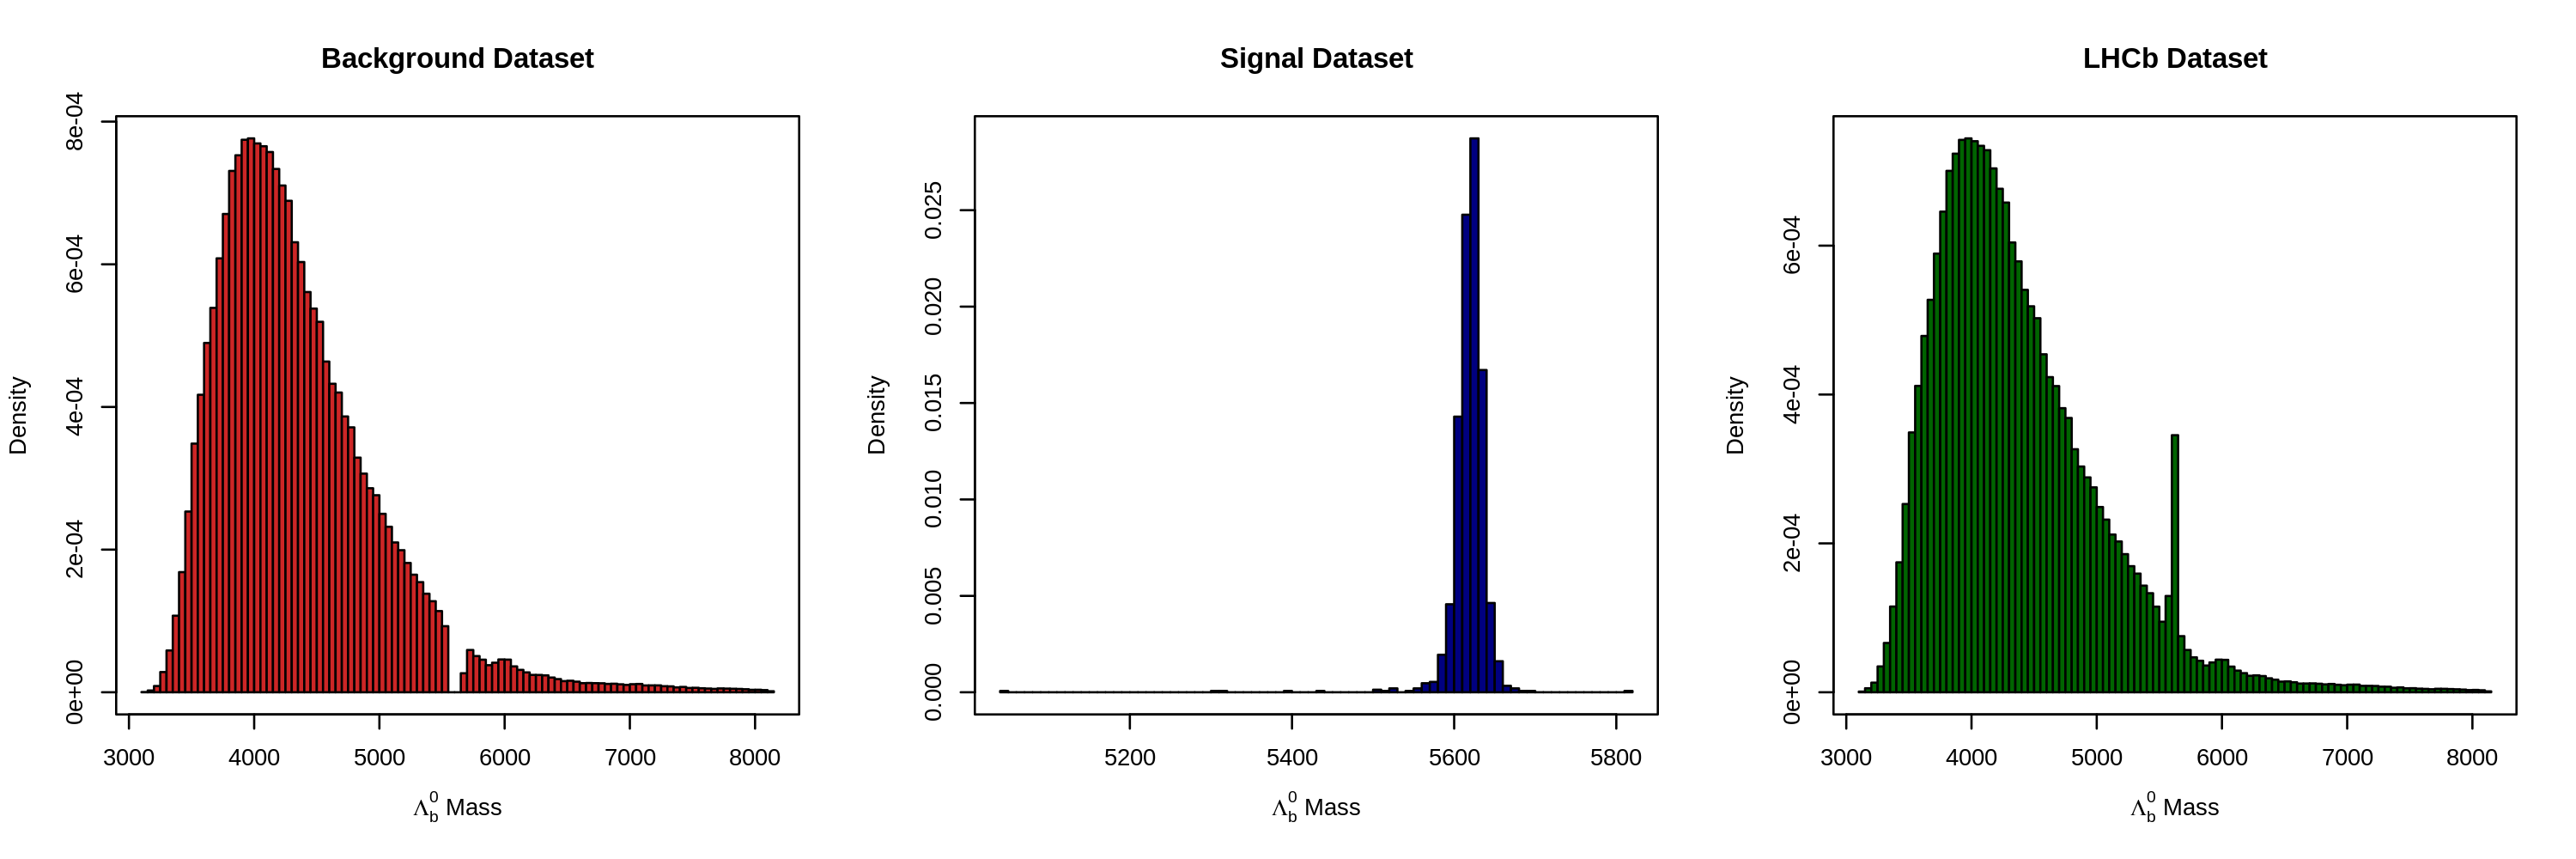

In [58]:
par(mfrow=c(1,3))
options(repr.plot.width=12, repr.plot.height=4, repr.plot.res=250)

hist(data.bkg$Lambda_b0_MM_F,   
     breaks=100, probability=TRUE, col="firebrick3",
     xlab=expression(paste(Lambda[b]^0, " Mass")), main="Background Dataset"); box()

hist(data.sig$Lambda_b0_MM_F,   
     breaks=100, probability=TRUE, col="navy", 
     xlab=expression(paste(Lambda[b]^0, " Mass")), main="Signal Dataset");     box()

hist(data.lhcb$Lambda_b0_MM_F, 
     breaks=100, probability=TRUE, col="darkgreen", 
     xlab=expression(paste(Lambda[b]^0, " Mass")), main="LHCb Dataset");       box()

**$\Lambda_{c}^{+}$ invariant mass**

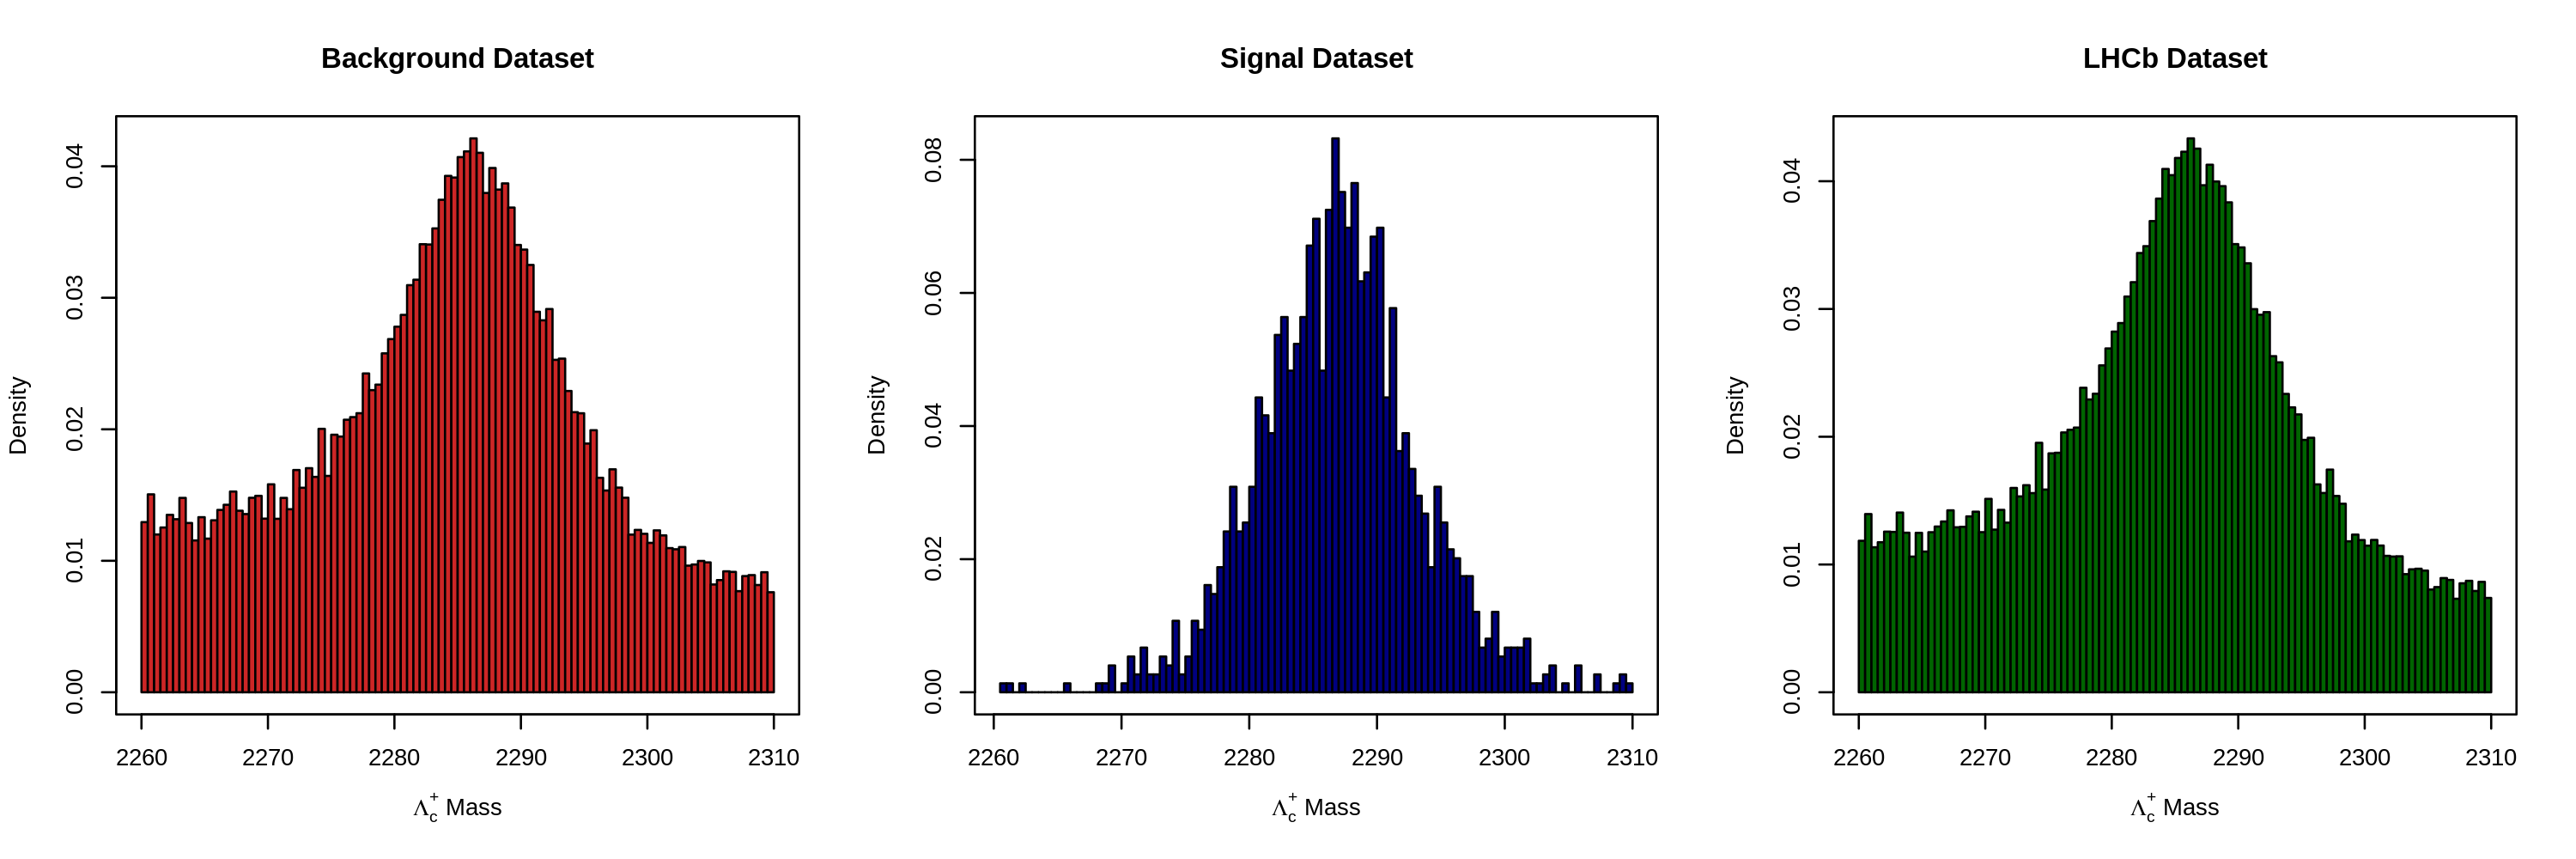

In [59]:
par(mfrow=c(1,3))
options(repr.plot.width=12, repr.plot.height=4, repr.plot.res=250)

hist(data.bkg$Lambda_c_MM_F,   
     breaks=100, probability=TRUE, col="firebrick3",
     xlab=expression(paste(Lambda[c]^'+', " Mass")), main="Background Dataset"); box()

hist(data.sig$Lambda_c_MM_F,   
     breaks=100, probability=TRUE, col="navy", 
     xlab=expression(paste(Lambda[c]^'+', " Mass")), main="Signal Dataset");     box()

hist(data.lhcb$Lambda_c_MM_F, 
     breaks=100, probability=TRUE, col="darkgreen", 
     xlab=expression(paste(Lambda[c]^'+', " Mass")), main="LHCb Dataset");       box()

**$\Lambda_{c}^{+*}$ invariant mass**

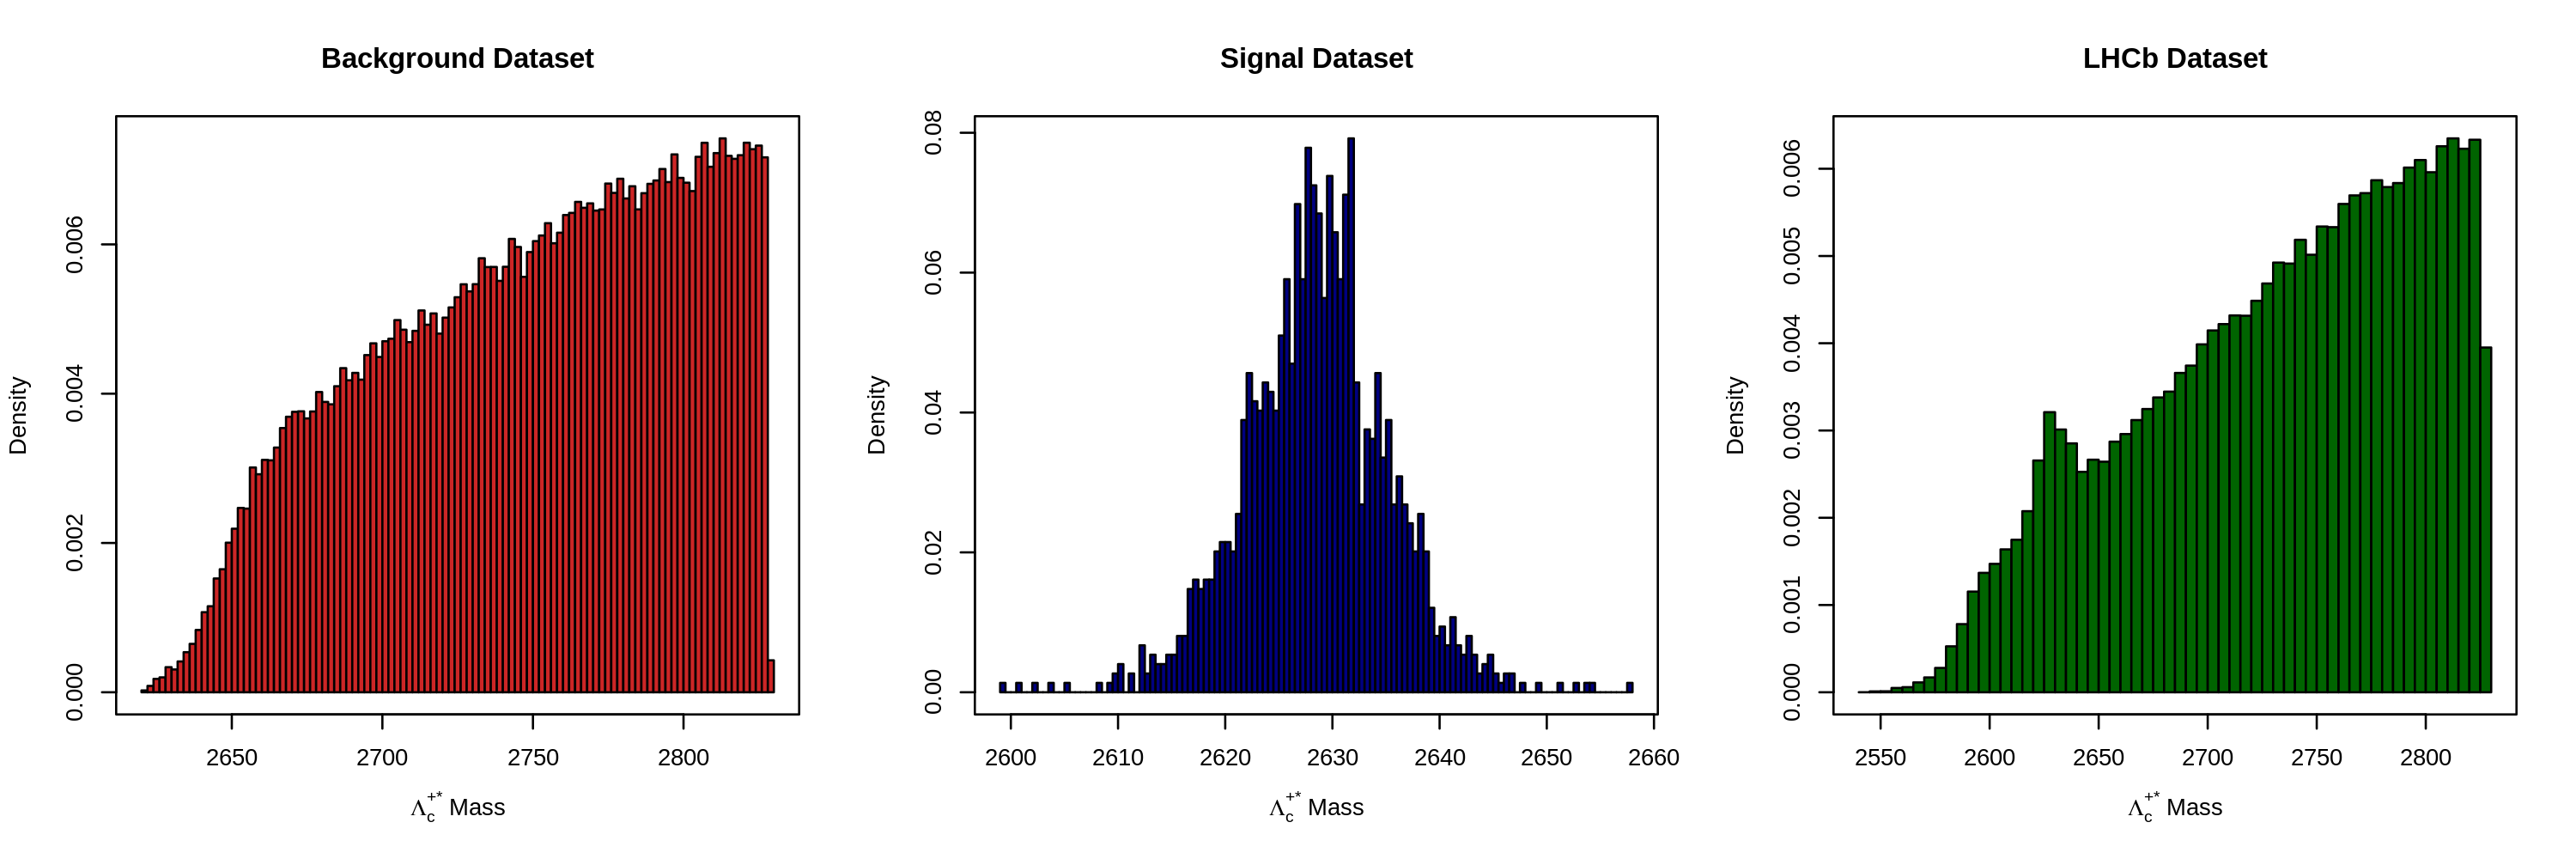

In [60]:
par(mfrow=c(1,3))
options(repr.plot.width=12, repr.plot.height=4, repr.plot.res=250)

hist(data.bkg$lcstar_MM_F,   
     breaks=100, probability=TRUE, col="firebrick3",
     xlab=expression(paste(Lambda[c]^"+*", " Mass")), main="Background Dataset"); box()

hist(data.sig$lcstar_MM_F,   
     breaks=100, probability=TRUE, col="navy", 
     xlab=expression(paste(Lambda[c]^"+*", " Mass")), main="Signal Dataset");     box()

hist(data.lhcb$lcstar_MM_F, 
     breaks=100, probability=TRUE, col="darkgreen", 
     xlab=expression(paste(Lambda[c]^"+*", " Mass")), main="LHCb Dataset");       box()

**$\Delta M$**

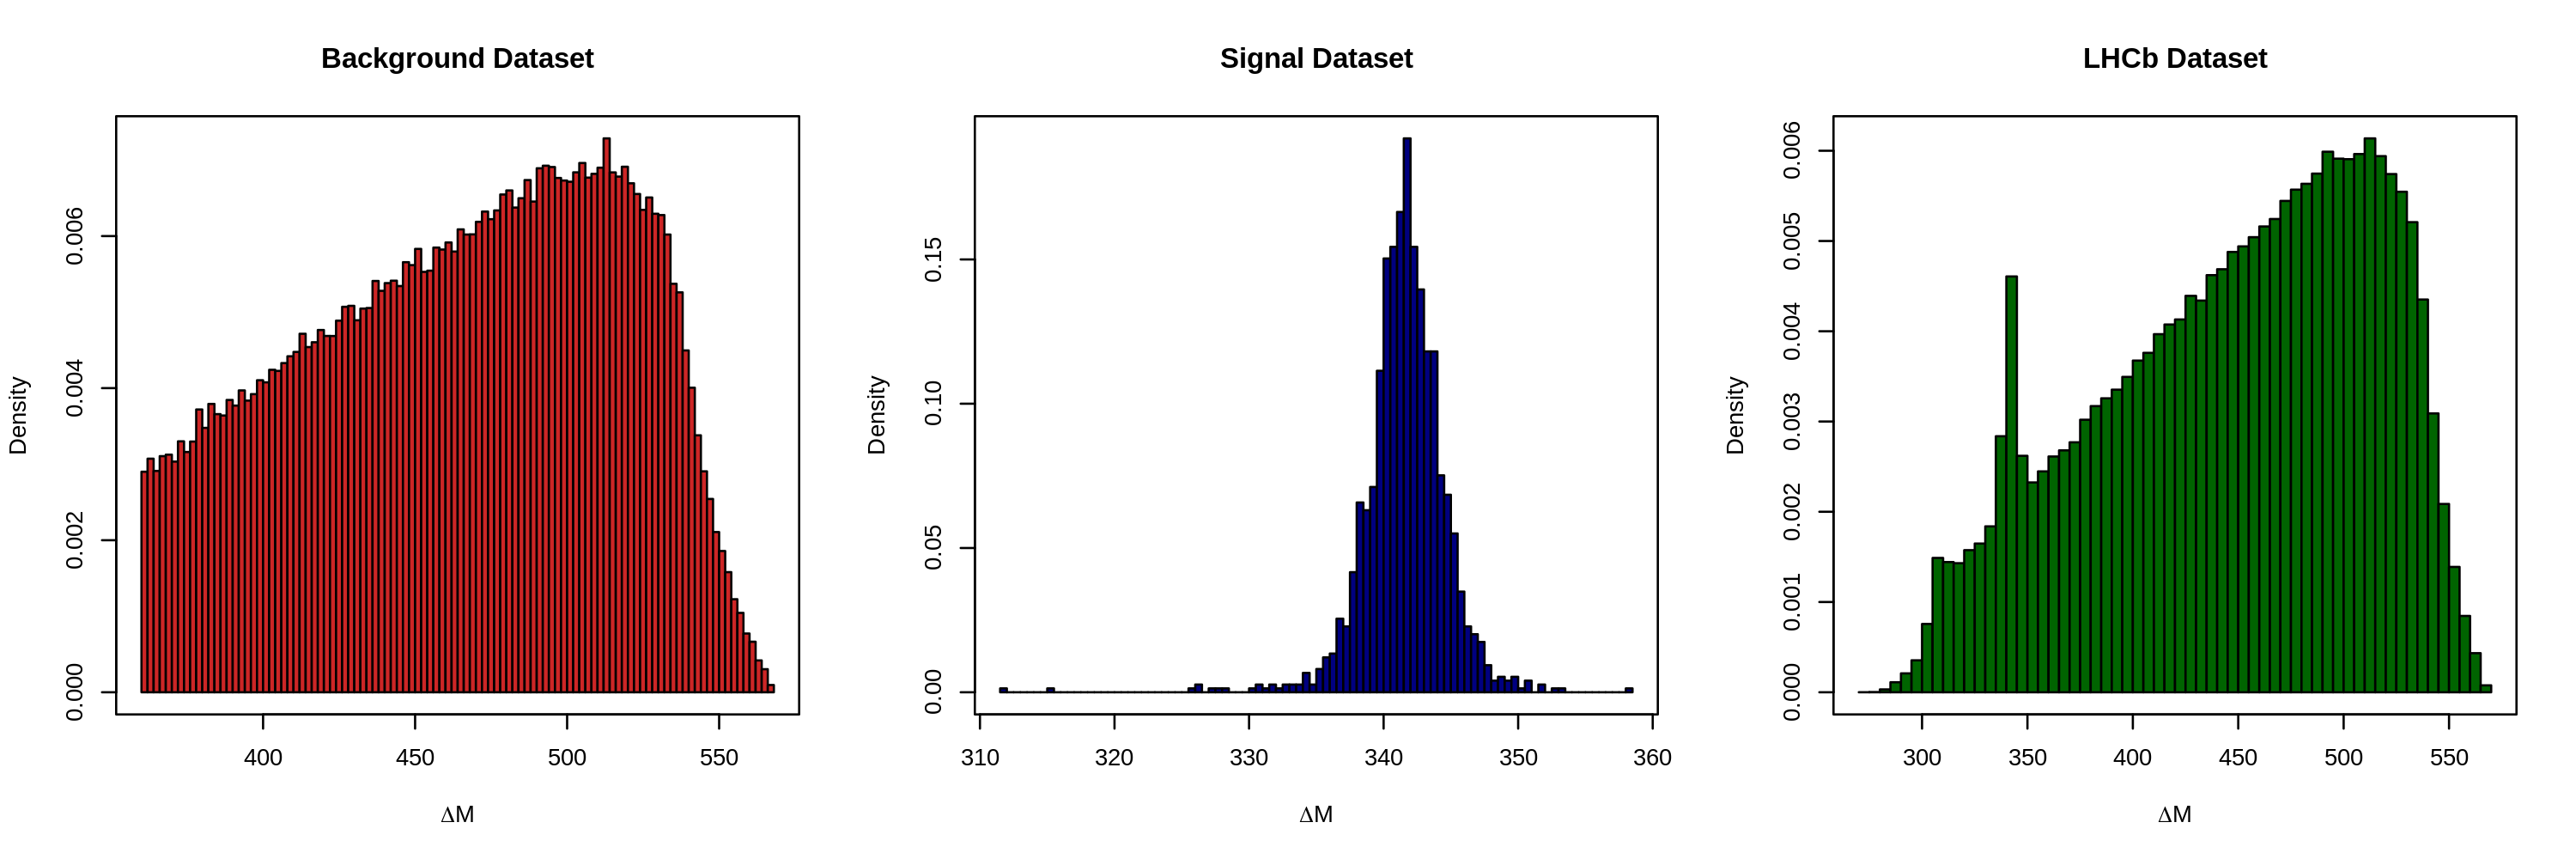

In [66]:
par(mfrow=c(1,3))
options(repr.plot.width=12, repr.plot.height=4, repr.plot.res=250)

hist(data.bkg$DeltaM_F,   
     breaks=100, probability=TRUE, col="firebrick3",
     xlab=expression(paste(Delta, "M")), main="Background Dataset"); box()

hist(data.sig$DeltaM_F,   
     breaks=100, probability=TRUE, col="navy", 
     xlab=expression(paste(Delta, "M")), main="Signal Dataset");     box()

hist(data.lhcb$DeltaM_F, 
     breaks=100, probability=TRUE, col="darkgreen", 
     xlab=expression(paste(Delta, "M")), main="LHCb Dataset");       box()

**$\Lambda_{b}^0$ decay time**

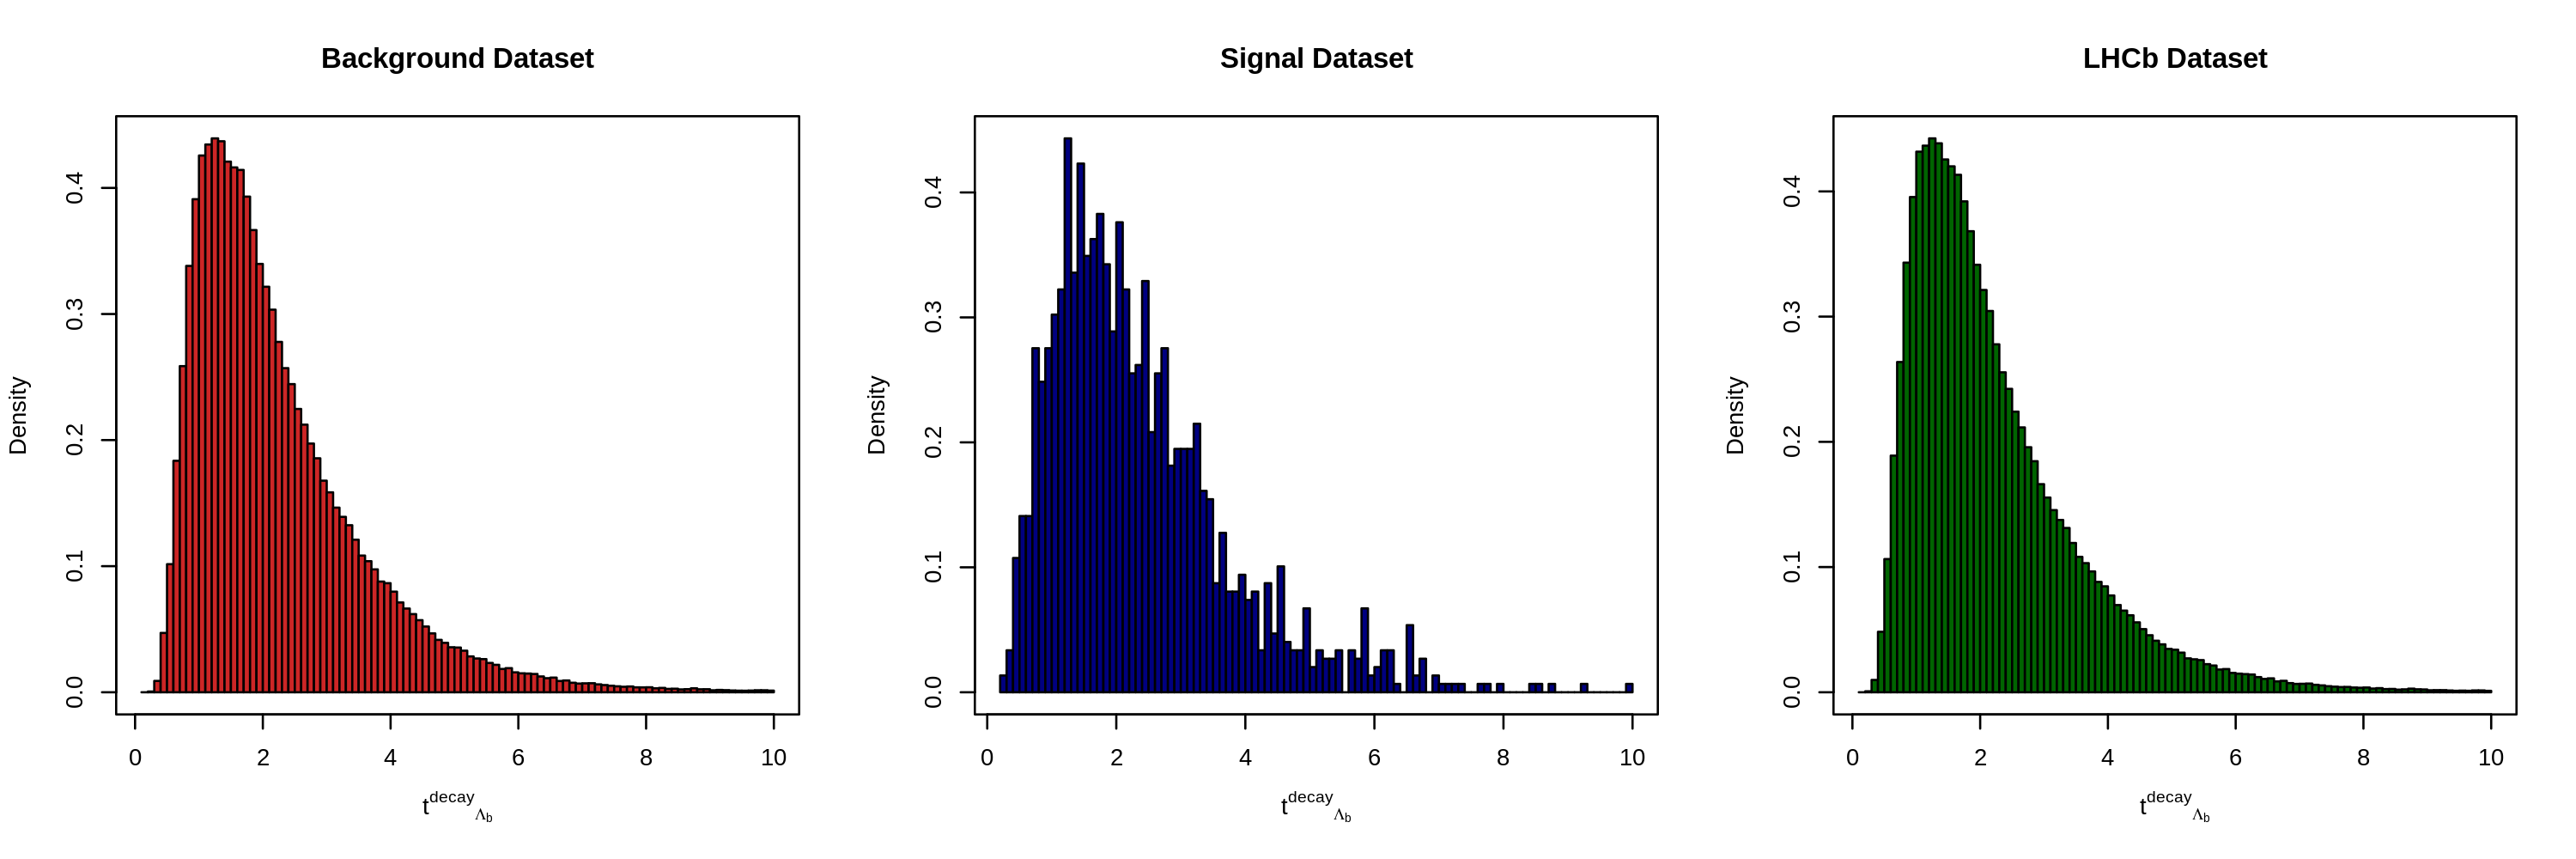

In [62]:
par(mfrow=c(1,3))
options(repr.plot.width=12, repr.plot.height=4, repr.plot.res=250)

hist(data.bkg$lbDecTime_F[data.bkg$lbDecTime_F<10],   
     breaks=100, probability=TRUE, col="firebrick3",
     xlab=expression(paste({t^"decay"}[Lambda[b]])), main="Background Dataset"); box()

hist(data.sig$lbDecTime_F[data.sig$lbDecTime_F<10],   
     breaks=100, probability=TRUE, col="navy", 
     xlab=expression(paste({t^"decay"}[Lambda[b]])), main="Signal Dataset");     box()

hist(data.lhcb$lbDecTime_F[data.lhcb$lbDecTime_F<10], 
     breaks=100, probability=TRUE, col="darkgreen", 
     xlab=expression(paste({t^"decay"}[Lambda[b]])), main="LHCb Dataset");       box()

**$\Lambda_{c}^{+}$ decay time**

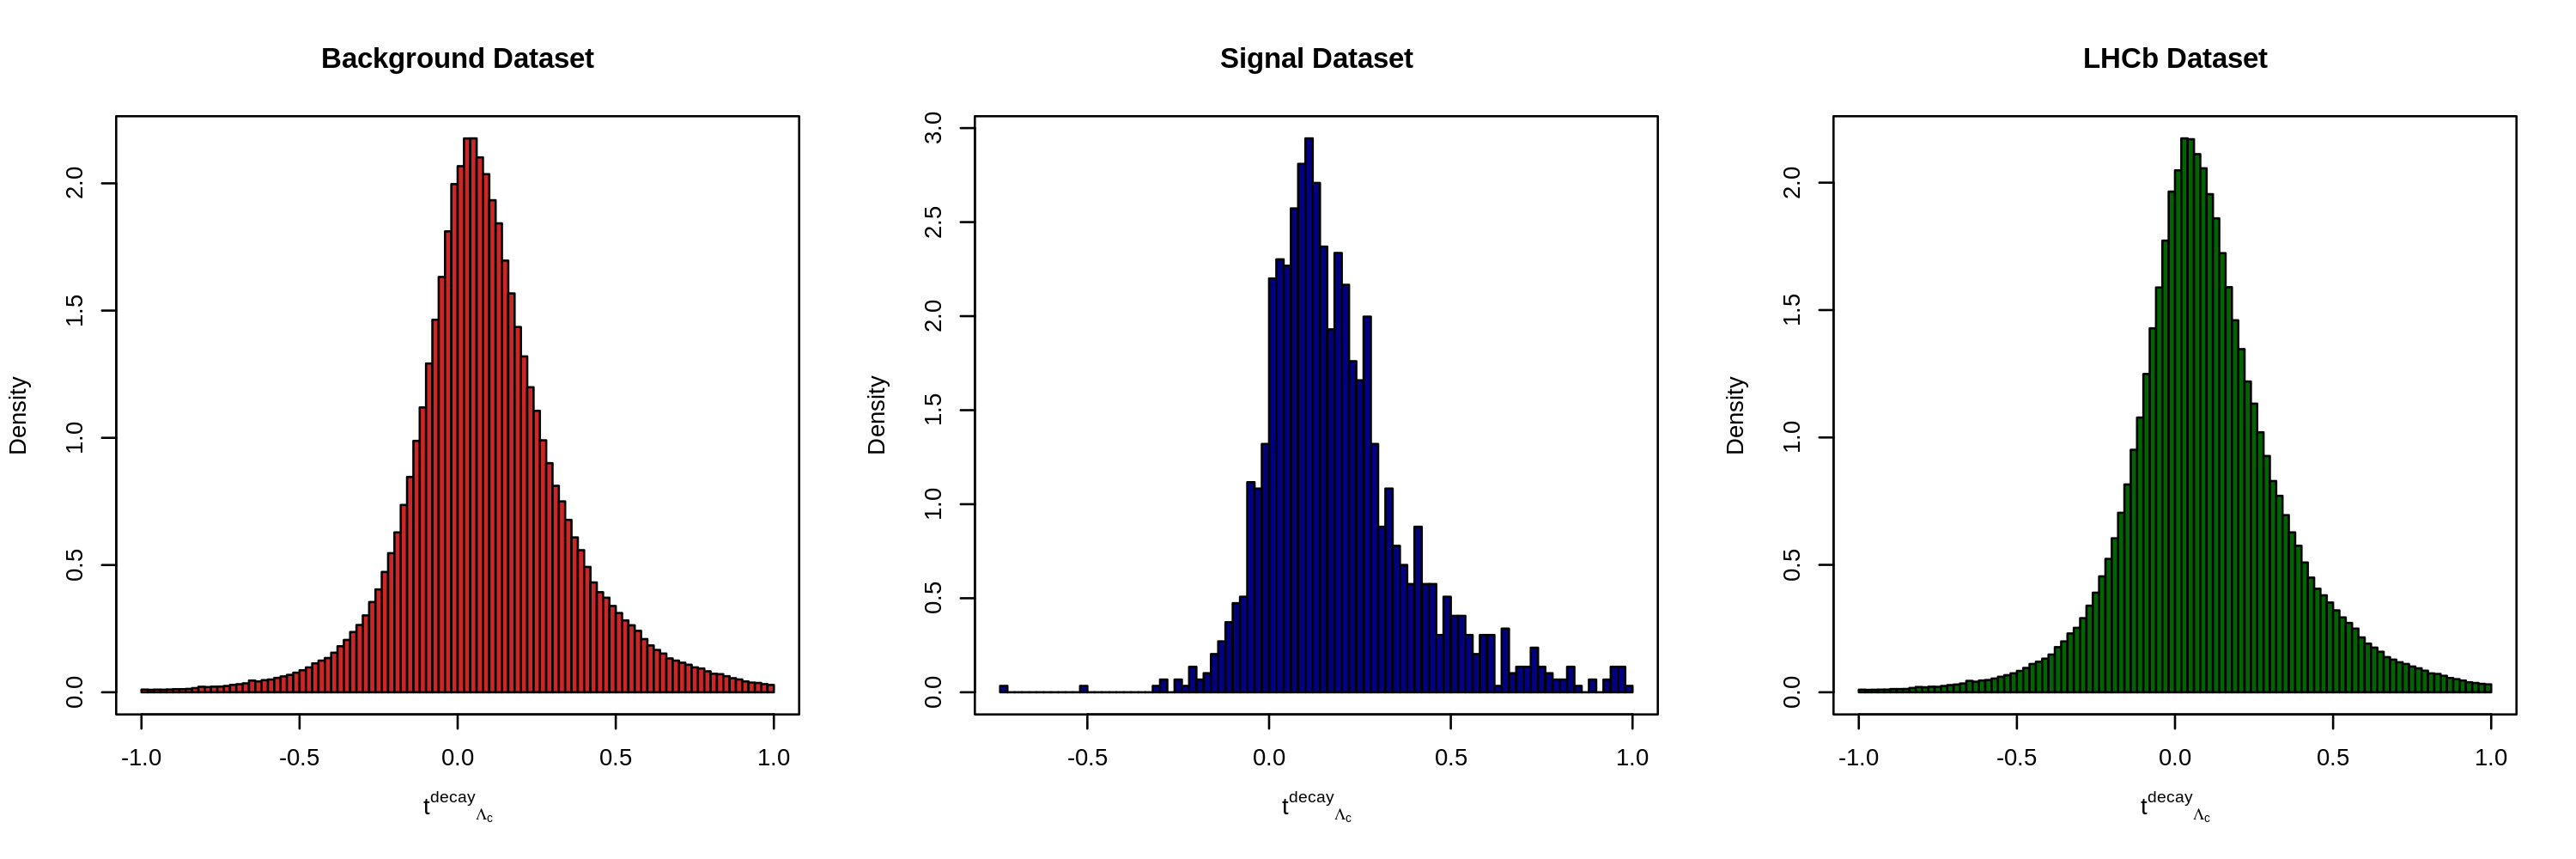

In [63]:
par(mfrow=c(1,3))
options(repr.plot.width=12, repr.plot.height=4, repr.plot.res=250)

hist(data.bkg$lcDecTime_F[data.bkg$lcDecTime_F<1 & data.bkg$lcDecTime_F>-1],   
     breaks=100, probability=TRUE, col="firebrick3",
     xlab=expression(paste({t^"decay"}[Lambda[c]])), main="Background Dataset"); box()

hist(data.sig$lcDecTime_F[data.sig$lcDecTime_F<1 & data.sig$lcDecTime_F>-1],   
     breaks=100, probability=TRUE, col="navy", 
     xlab=expression(paste({t^"decay"}[Lambda[c]])), main="Signal Dataset");     box()

hist(data.lhcb$lcDecTime_F[data.lhcb$lcDecTime_F<1 & data.lhcb$lcDecTime_F>-1], 
     breaks=100, probability=TRUE, col="darkgreen", 
     xlab=expression(paste({t^"decay"}[Lambda[c]])), main="LHCb Dataset");       box()

**$\Lambda_{c}^{+*}$ decay time**

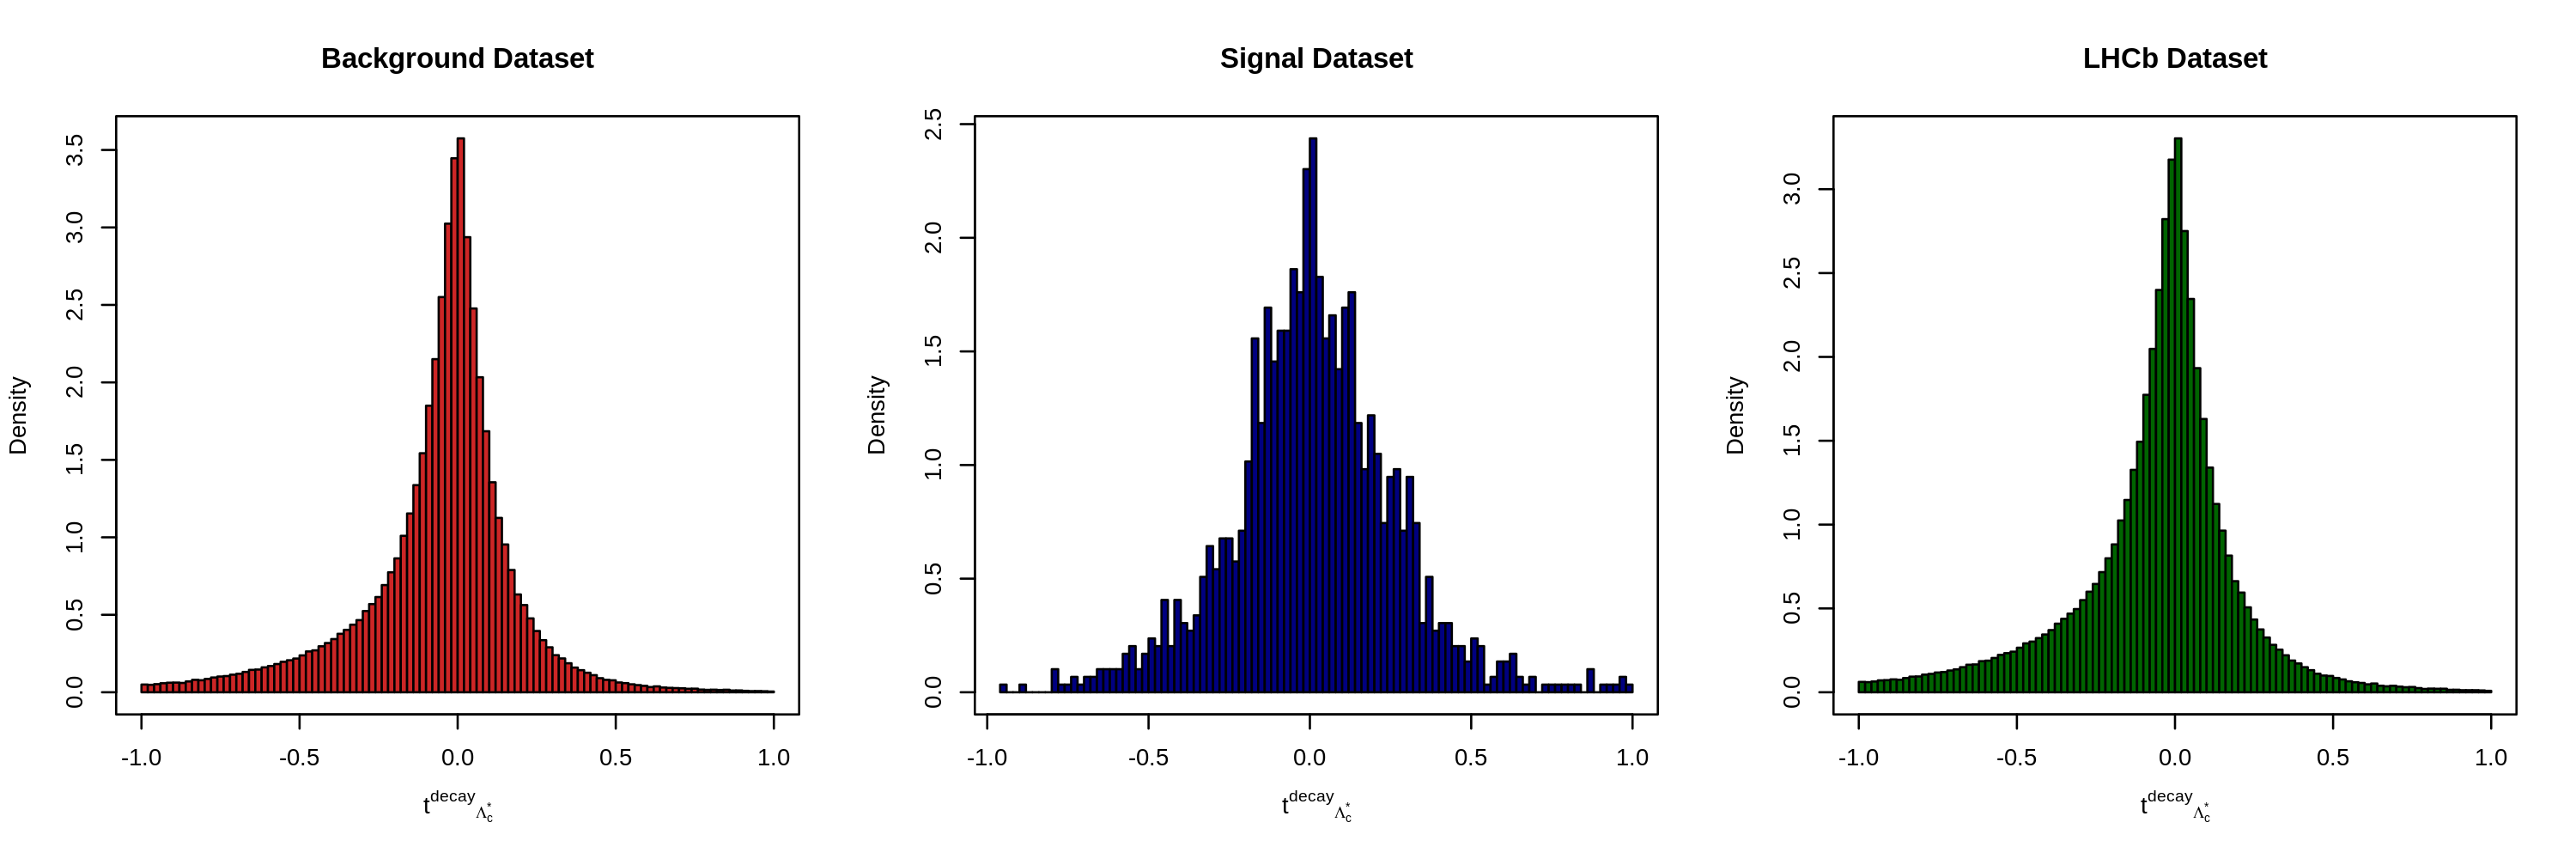

In [64]:
par(mfrow=c(1,3))
options(repr.plot.width=12, repr.plot.height=4, repr.plot.res=250)

hist(data.bkg$lcstarDecTime_F[data.bkg$lcstarDecTime_F<1 & data.bkg$lcstarDecTime_F>-1],   
     breaks=100, probability=TRUE, col="firebrick3",
     xlab=expression(paste({t^"decay"}[Lambda[c]^"*"])), main="Background Dataset"); box()

hist(data.sig$lcstarDecTime_F[data.sig$lcstarDecTime_F<1 & data.sig$lcstarDecTime_F>-1],   
     breaks=100, probability=TRUE, col="navy", 
     xlab=expression(paste({t^"decay"}[Lambda[c]^"*"])), main="Signal Dataset");     box()

hist(data.lhcb$lcstarDecTime_F[data.lhcb$lcstarDecTime_F<1 & data.lhcb$lcstarDecTime_F>-1], 
     breaks=100, probability=TRUE, col="darkgreen", 
     xlab=expression(paste({t^"decay"}[Lambda[c]^"*"])), main="LHCb Dataset");       box()

**Probability of $\Lambda_c^+p$ identified as a proton**

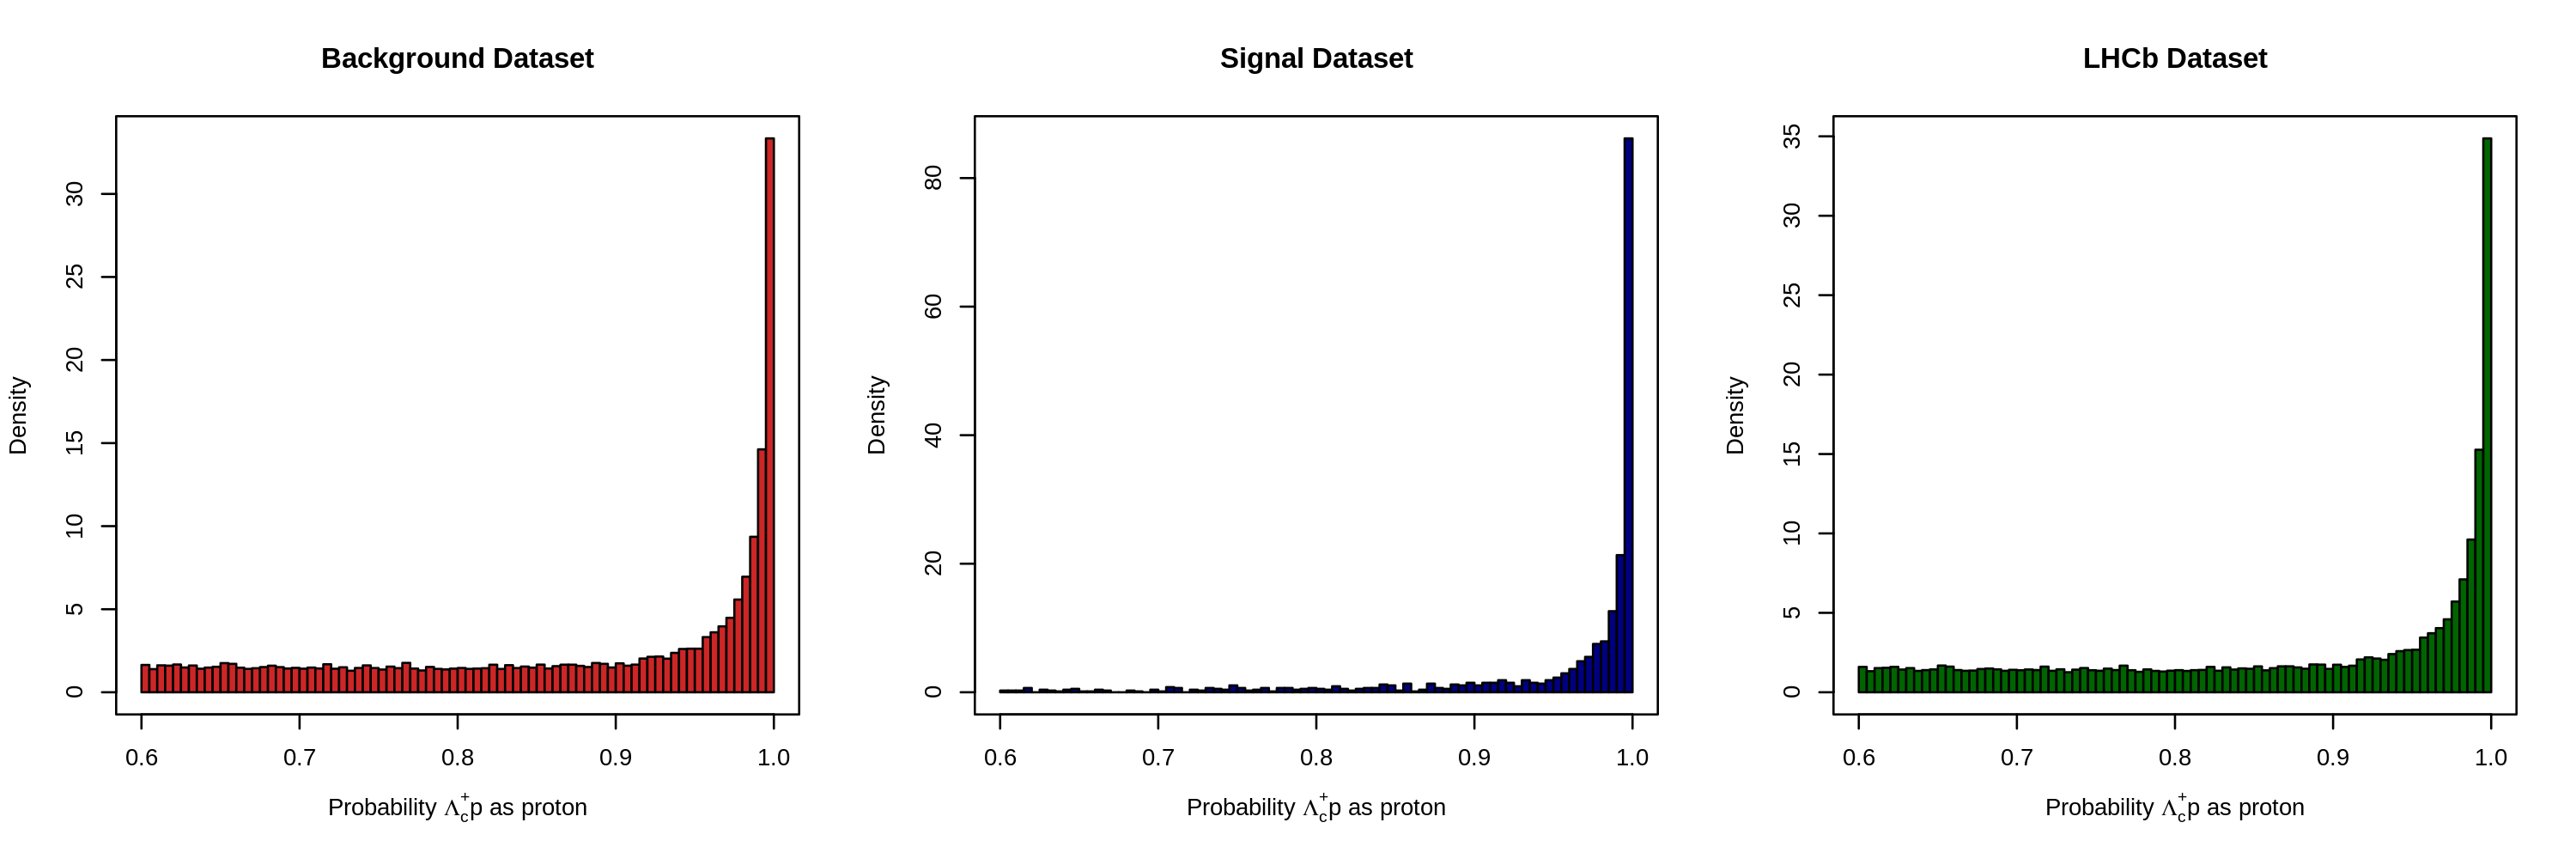

In [51]:
par(mfrow=c(1,3))
options(repr.plot.width=12, repr.plot.height=4, repr.plot.res=250)

hist(data.bkg$lc_p_ProbNNp_F,   
     breaks=100, probability=TRUE, col="firebrick3",
     xlab=expression(paste("Probability ", Lambda[c]^"+", p, " as proton")), main="Background Dataset"); box()

hist(data.sig$lc_p_ProbNNp_F,   
     breaks=100, probability=TRUE, col="navy", 
     xlab=expression(paste("Probability ", Lambda[c]^"+", p, " as proton")), main="Signal Dataset");     box()

hist(data.lhcb$lc_p_ProbNNp_F, 
     breaks=100, probability=TRUE, col="darkgreen", 
     xlab=expression(paste("Probability ", Lambda[c]^"+", p, " as proton")), main="LHCb Dataset");       box()

**$\Lambda_c^+$ z decay length over error**

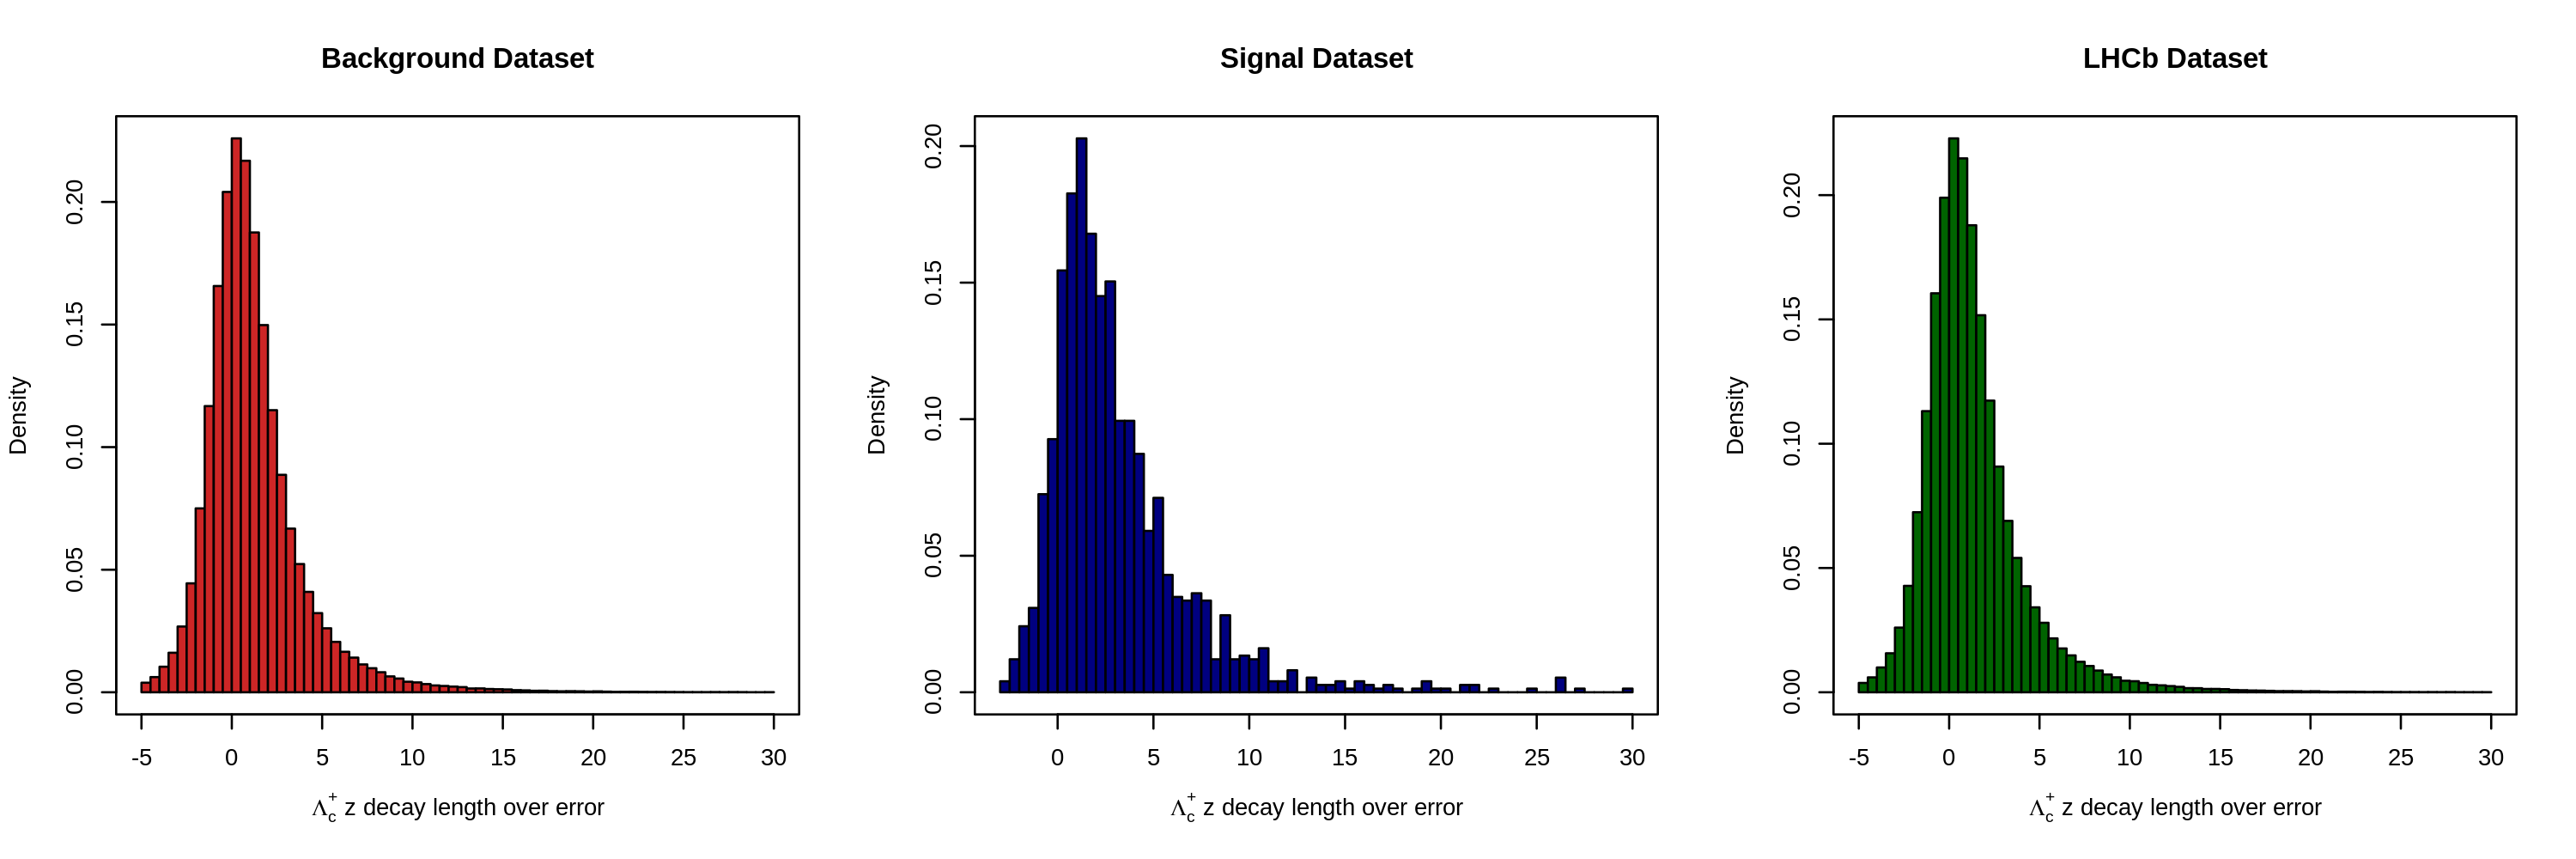

In [54]:
par(mfrow=c(1,3))
options(repr.plot.width=12, repr.plot.height=4, repr.plot.res=250)

hist(data.bkg$lcZDecLSigma_F[data.bkg$lcZDecLSigma_F<30 & data.bkg$lcZDecLSigma_F>-5],   
     breaks=100, probability=TRUE, col="firebrick3",
     xlab=expression(paste(Lambda[c]^"+", " z decay length over error")), main="Background Dataset"); box()

hist(data.sig$lcZDecLSigma_F[data.sig$lcZDecLSigma_F<30 & data.sig$lcZDecLSigma_F>-5],   
     breaks=100, probability=TRUE, col="navy", 
     xlab=expression(paste(Lambda[c]^"+", " z decay length over error")), main="Signal Dataset");     box()

hist(data.lhcb$lcZDecLSigma_F[data.lhcb$lcZDecLSigma_F<30 & data.lhcb$lcZDecLSigma_F>-5], 
     breaks=100, probability=TRUE, col="darkgreen", 
     xlab=expression(paste(Lambda[c]^"+", " z decay length over error")), main="LHCb Dataset");       box()

**$\Lambda_c^{+*}$ z decay length over error**

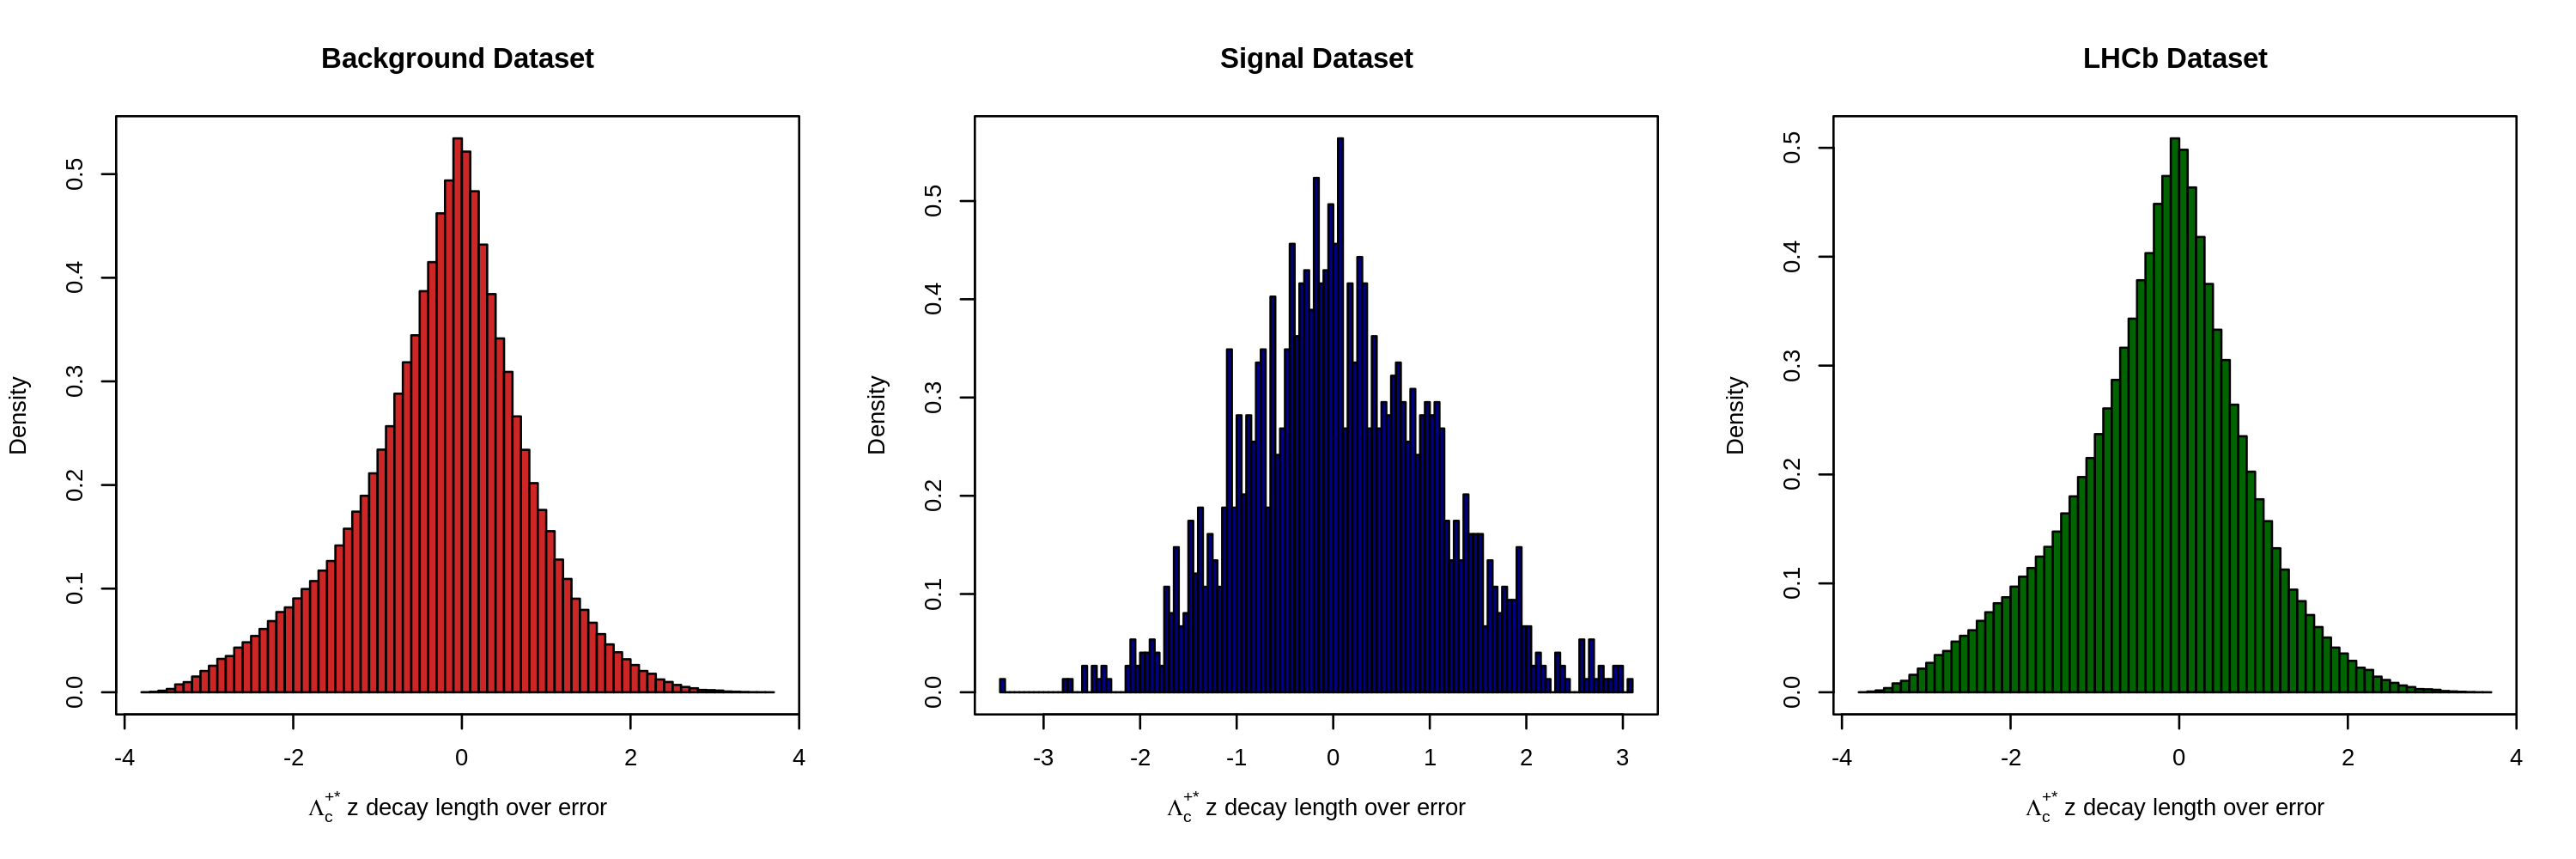

In [57]:
par(mfrow=c(1,3))
options(repr.plot.width=12, repr.plot.height=4, repr.plot.res=250)

hist(data.bkg$lcstarZDecLSigma_F,   
     breaks=100, probability=TRUE, col="firebrick3",
     xlab=expression(paste(Lambda[c]^"+*", " z decay length over error")), main="Background Dataset"); box()

hist(data.sig$lcstarZDecLSigma_F,   
     breaks=100, probability=TRUE, col="navy", 
     xlab=expression(paste(Lambda[c]^"+*", " z decay length over error")), main="Signal Dataset");     box()

hist(data.lhcb$lcstarZDecLSigma_F, 
     breaks=100, probability=TRUE, col="darkgreen", 
     xlab=expression(paste(Lambda[c]^"+*", " z decay length over error")), main="LHCb Dataset");       box()

**$\Lambda_b^{0}$ $\chi^2_{\mathrm{vertex}}$**

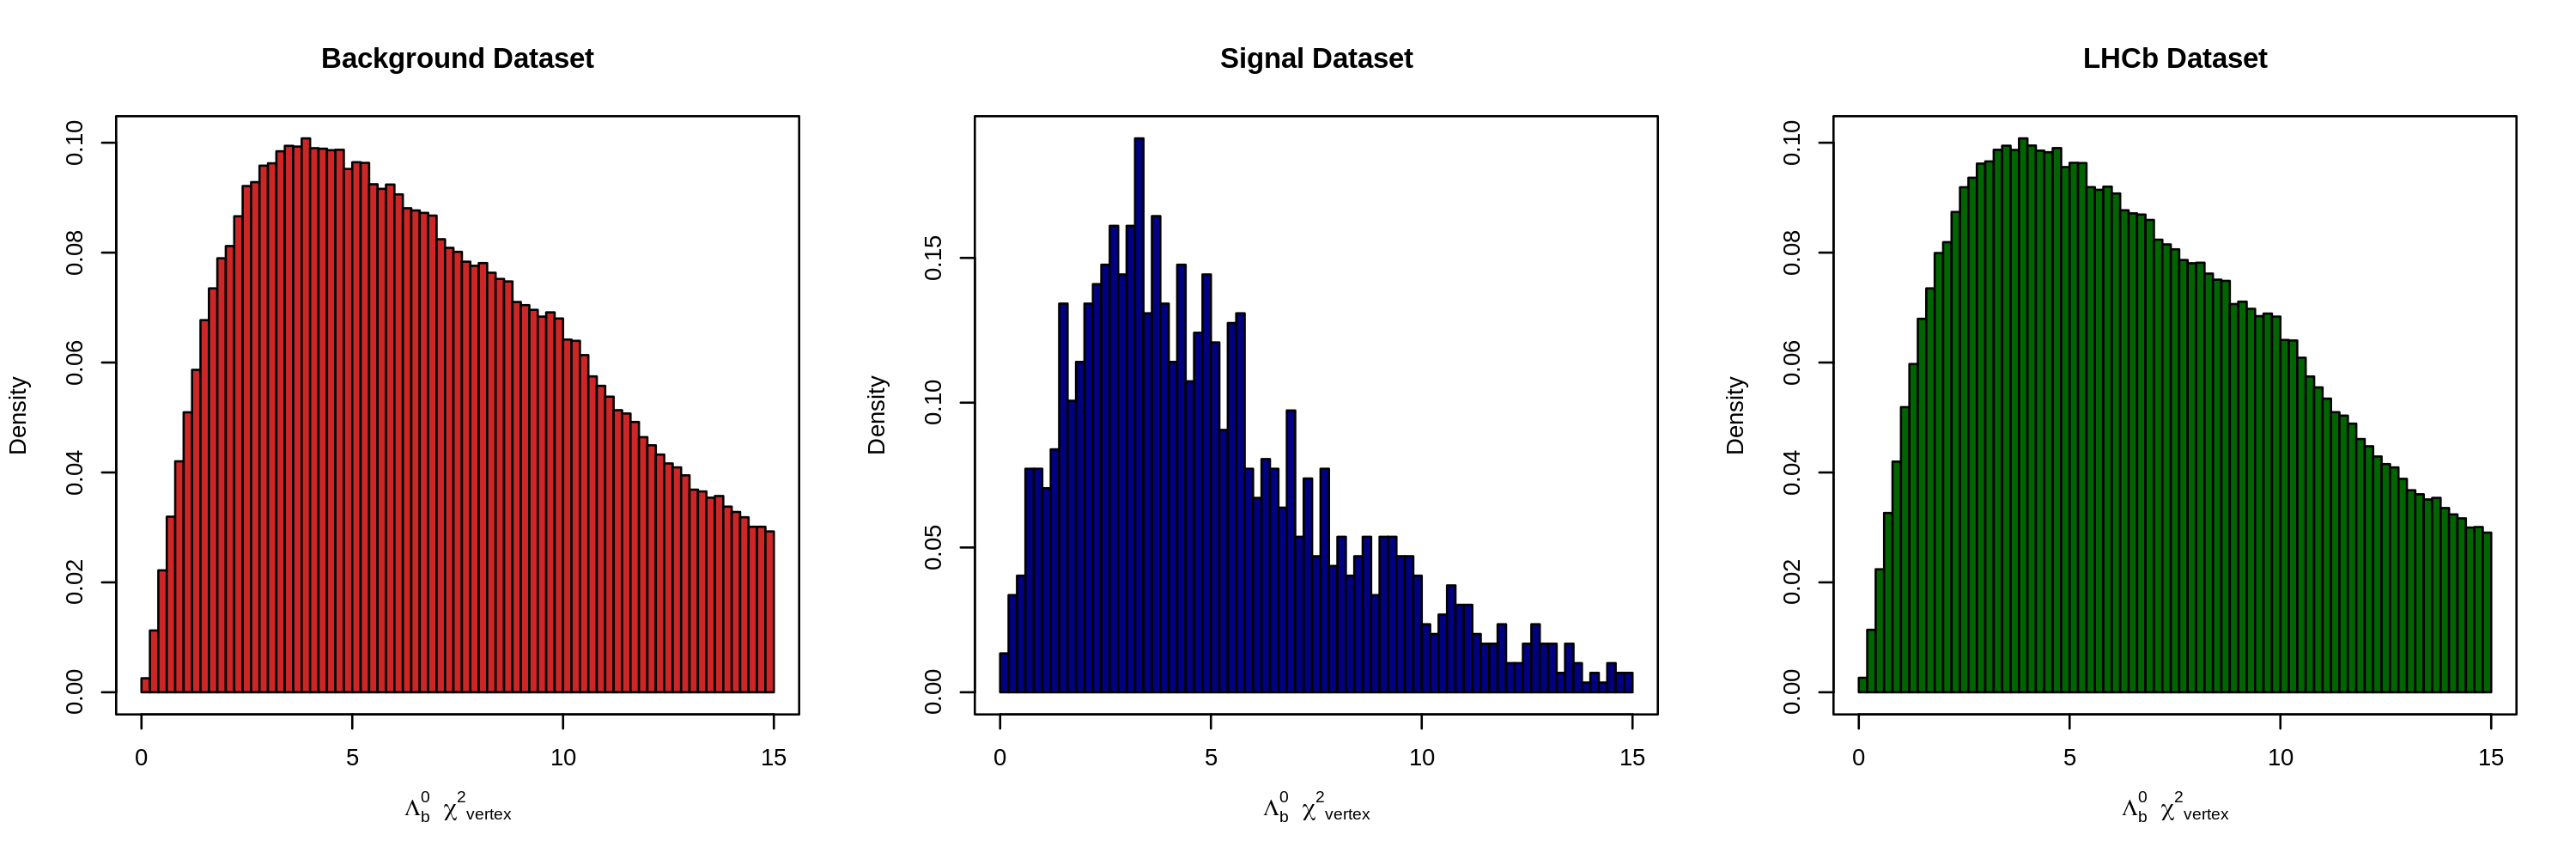

In [73]:
par(mfrow=c(1,3))
options(repr.plot.width=12, repr.plot.height=4, repr.plot.res=250)

hist(data.bkg$Lambda_b0_ENDVERTEX_CHI2_F,   
     breaks=100, probability=TRUE, col="firebrick3",
     xlab=expression(paste(Lambda[b]^"0", "  ", {chi^2}[vertex])), main="Background Dataset"); box()

hist(data.sig$Lambda_b0_ENDVERTEX_CHI2_F,   
     breaks=100, probability=TRUE, col="navy", 
     xlab=expression(paste(Lambda[b]^"0", "  ", {chi^2}[vertex])), main="Signal Dataset");     box()

hist(data.lhcb$Lambda_b0_ENDVERTEX_CHI2_F, 
     breaks=100, probability=TRUE, col="darkgreen", 
     xlab=expression(paste(Lambda[b]^"0", "  ", {chi^2}[vertex])), main="LHCb Dataset");       box()

**$\Lambda_c^{+}$ $\chi^2_{\mathrm{vertex}}$**

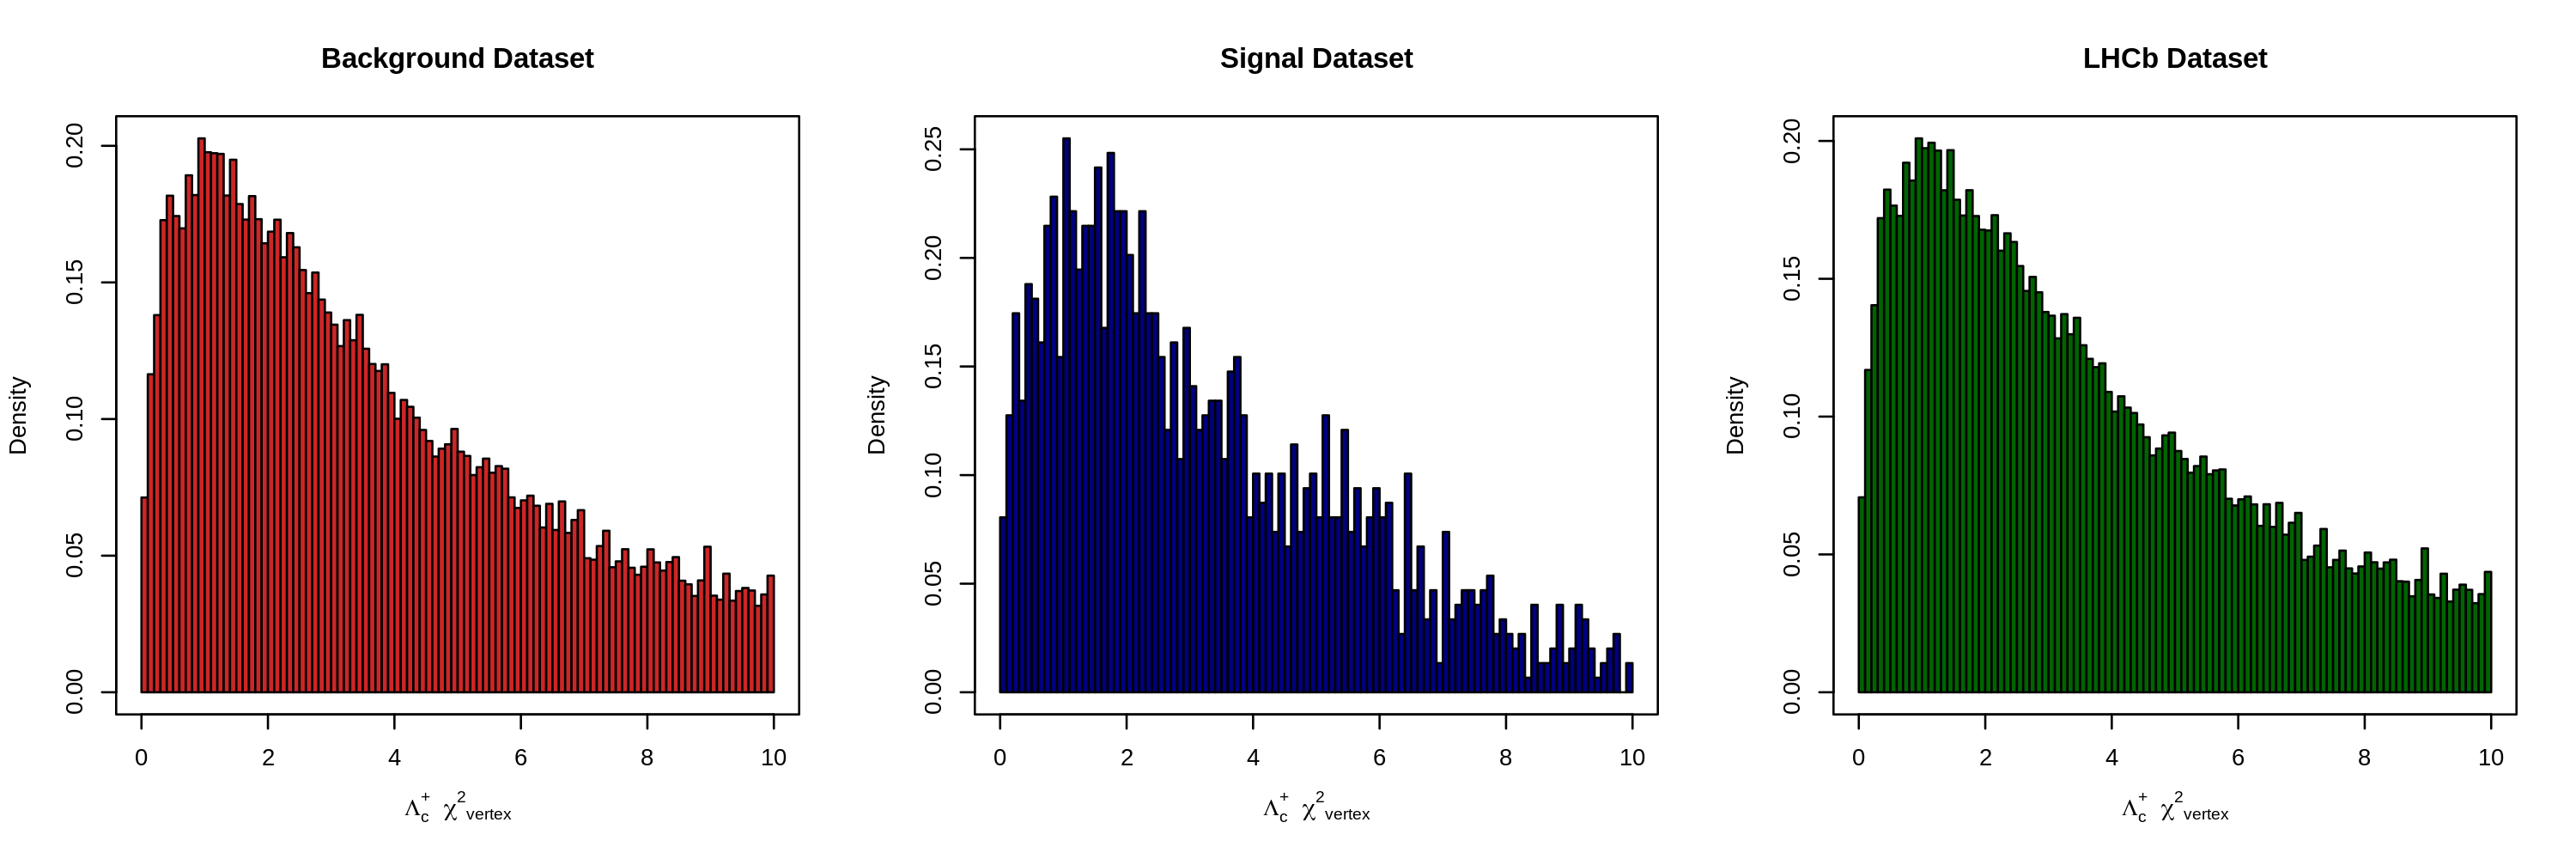

In [72]:
par(mfrow=c(1,3))
options(repr.plot.width=12, repr.plot.height=4, repr.plot.res=250)

hist(data.bkg$Lambda_c_ENDVERTEX_CHI2_F,   
     breaks=100, probability=TRUE, col="firebrick3",
     xlab=expression(paste(Lambda[c]^"+", "  ", {chi^2}[vertex])), main="Background Dataset"); box()

hist(data.sig$Lambda_c_ENDVERTEX_CHI2_F,   
     breaks=100, probability=TRUE, col="navy", 
     xlab=expression(paste(Lambda[c]^"+", "  ", {chi^2}[vertex])), main="Signal Dataset");     box()

hist(data.lhcb$Lambda_c_ENDVERTEX_CHI2_F, 
     breaks=100, probability=TRUE, col="darkgreen", 
     xlab=expression(paste(Lambda[c]^"+", "  ", {chi^2}[vertex])), main="LHCb Dataset");       box()

**$\Lambda_c^{+*}$ $\chi^2_{\mathrm{vertex}}$**

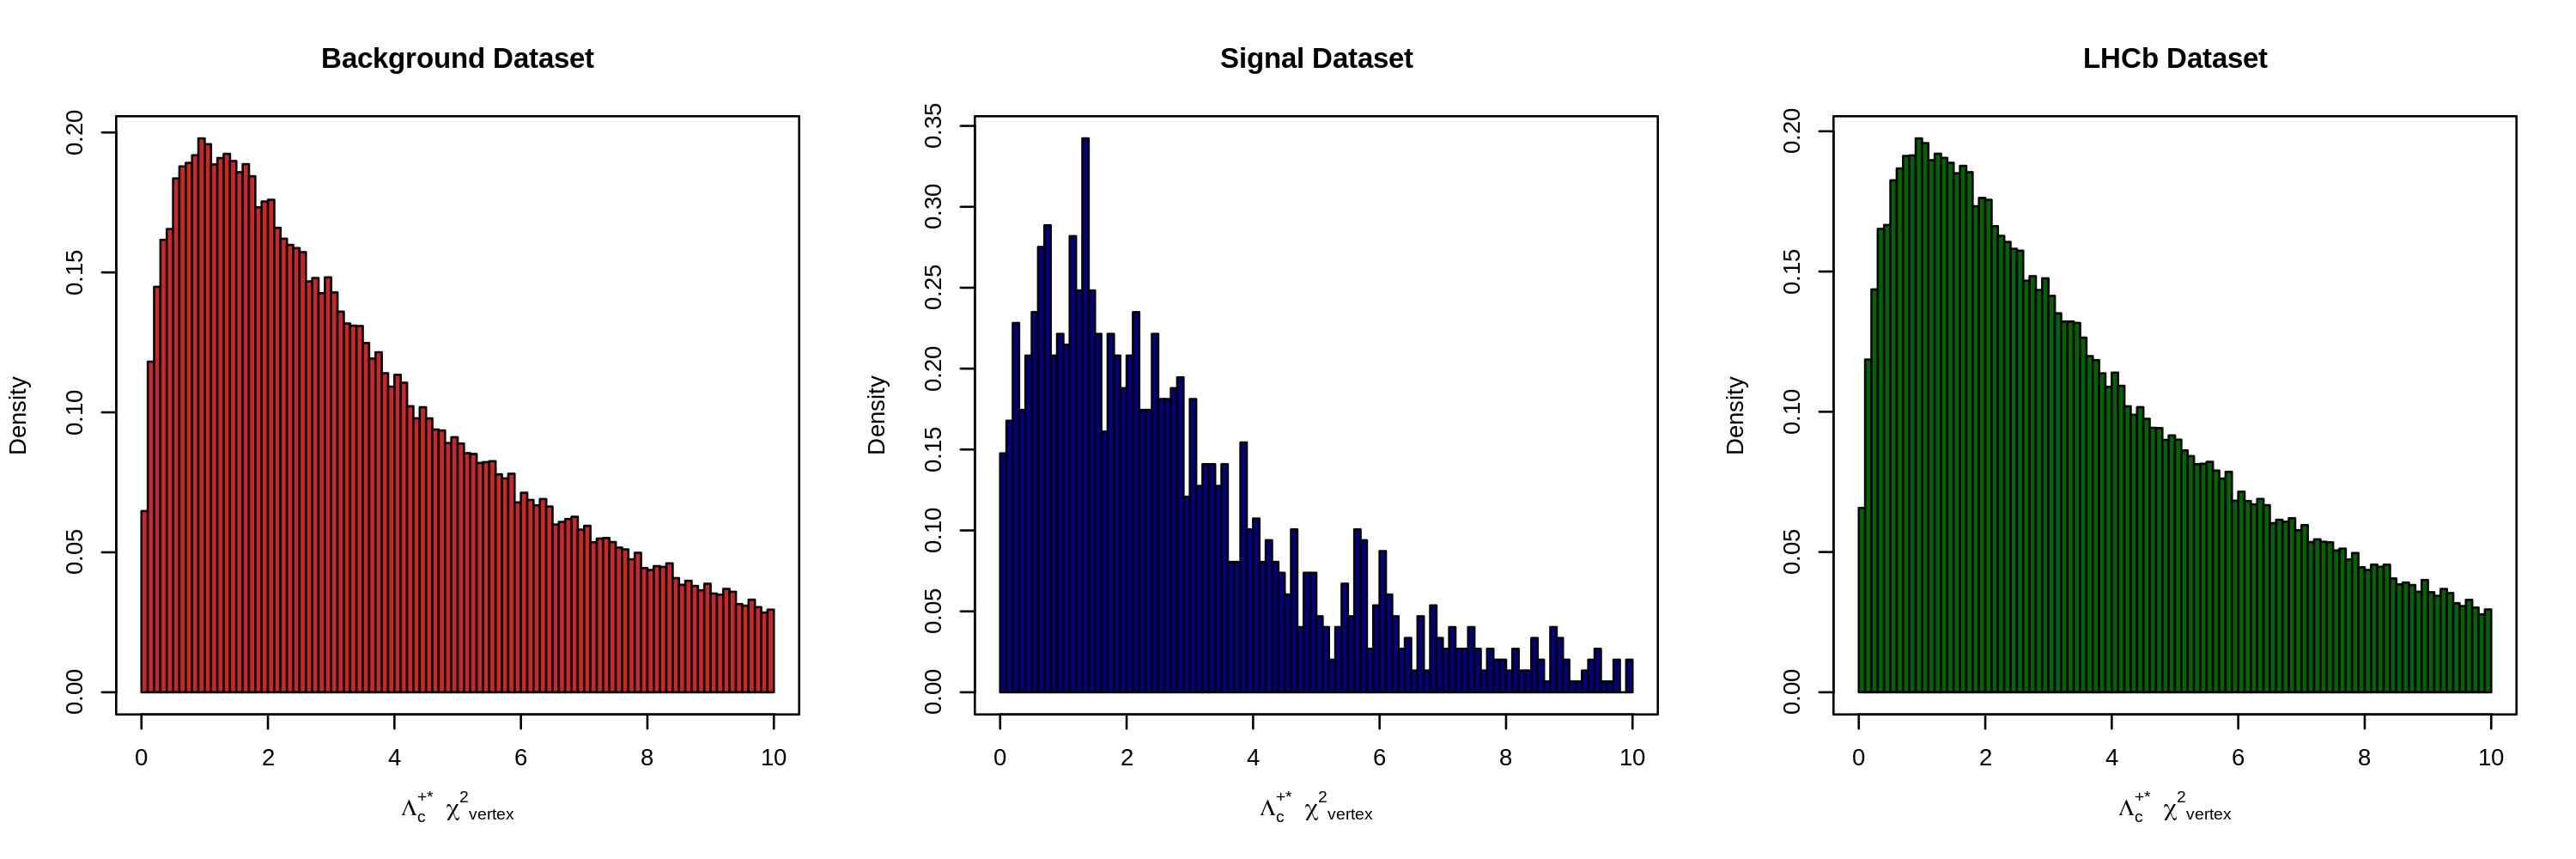

In [74]:
par(mfrow=c(1,3))
options(repr.plot.width=12, repr.plot.height=4, repr.plot.res=250)

hist(data.bkg$lcstar_ENDVERTEX_CHI2_F,   
     breaks=100, probability=TRUE, col="firebrick3",
     xlab=expression(paste(Lambda[c]^"+*", "  ", {chi^2}[vertex])), main="Background Dataset"); box()

hist(data.sig$lcstar_ENDVERTEX_CHI2_F,   
     breaks=100, probability=TRUE, col="navy", 
     xlab=expression(paste(Lambda[c]^"+*", "  ", {chi^2}[vertex])), main="Signal Dataset");     box()

hist(data.lhcb$lcstar_ENDVERTEX_CHI2_F, 
     breaks=100, probability=TRUE, col="darkgreen", 
     xlab=expression(paste(Lambda[c]^"+*", "  ", {chi^2}[vertex])), main="LHCb Dataset");       box()

**$\Lambda_b^{0}$ DIRA of PV**

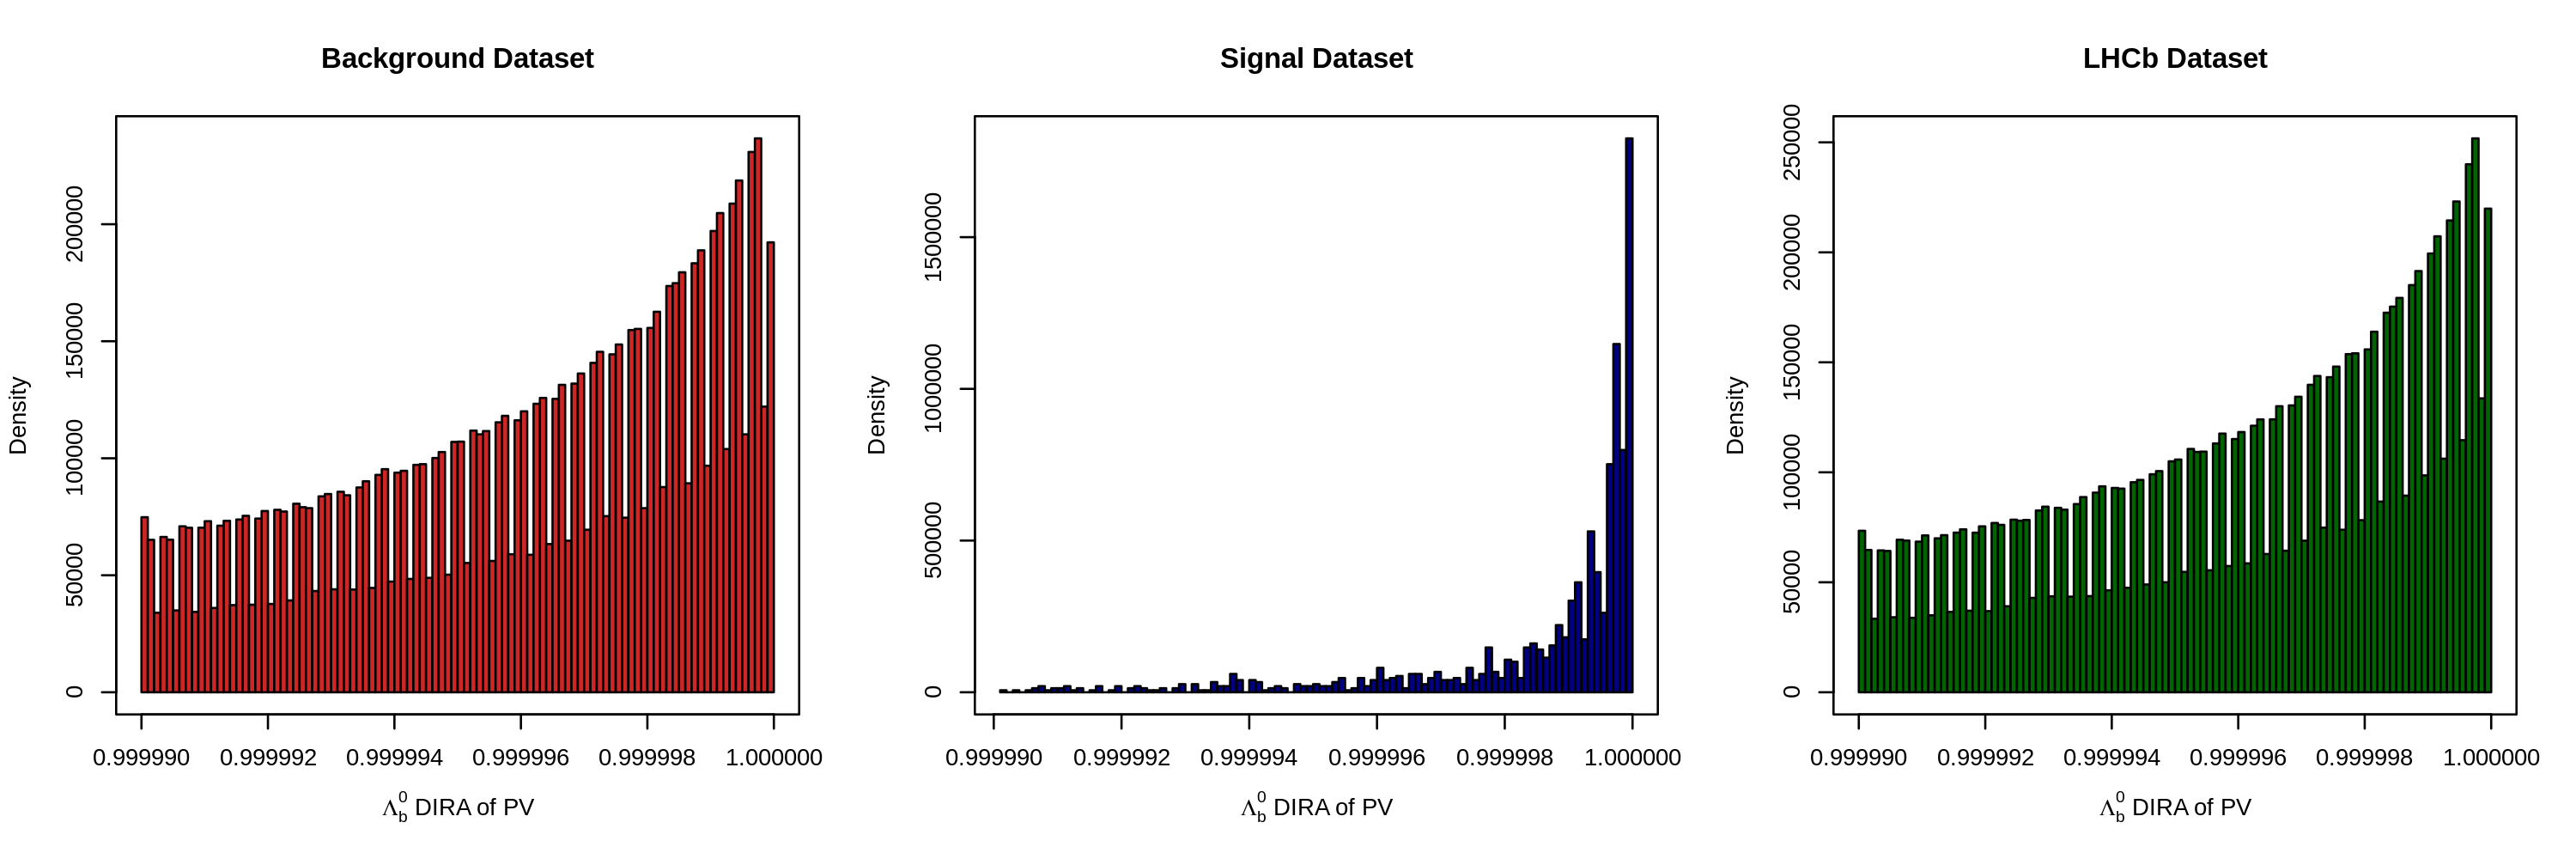

In [82]:
par(mfrow=c(1,3))
options(repr.plot.width=12, repr.plot.height=4, repr.plot.res=250)

hist(data.bkg$Lambda_b0_DIRA_OWNPV_F,   
     breaks=100, probability=TRUE, col="firebrick3",
     xlab=expression(paste(Lambda[b]^"0", " DIRA of PV")), main="Background Dataset"); box()

hist(data.sig$Lambda_b0_DIRA_OWNPV_F,   
     breaks=100, probability=TRUE, col="navy", 
     xlab=expression(paste(Lambda[b]^"0", " DIRA of PV")), main="Signal Dataset");     box()

hist(data.lhcb$Lambda_b0_DIRA_OWNPV_F, 
     breaks=100, probability=TRUE, col="darkgreen", 
     xlab=expression(paste(Lambda[b]^"0", " DIRA of PV")), main="LHCb Dataset");       box()

***
## References <a class="anchor" id="AS4PA_FP.REF."></a>
* [Index](#FP.i)

* [**[1]**](#AS4PA_FP.REF.1.) : "*Study of the decay $\Lambda_b^0 \longrightarrow \Lambda_c^{∗+} \pi^{-}\pi^{+}\pi^{-}$*", Pietro Argenton, http://tesi.cab.unipd.it/62008/1/Argenton_Pietro_tesi.pdf
* [**[2]**](#AS4PA_FP.REF.2.) : 
***